In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
from collections import Counter
from functools import reduce
from itertools import chain
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
from keras.utils.vis_utils import plot_model

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
##### Import the dataset #####
df = pd.read_csv('/content/Hotel Reservations.csv')

##### Show the dataset #####
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [3]:
##### Print the number of records of this dataset #####
print('The number of records of this dataset is {}'.format(df.shape[0]),'\n')
print('The number of columns of this dataset is {}'.format(df.shape[1]))

The number of records of this dataset is 36275 

The number of columns of this dataset is 19


In [4]:
##### Show is there NaN value in this dataset or not #####
def check_NaN(df):
  return 'There is no NaN value in this dataset.' if df.isnull().sum().sum() == 0 else 'There is NaN value in this dataset.'

print(check_NaN(df))

There is no NaN value in this dataset.


In [5]:
##### Show the unique value of booking_status #####
print('The unique value of this booking_status is {}'.format(df.loc[:, 'booking_status'].unique()))

The unique value of this booking_status is ['Not_Canceled' 'Canceled']


The value counts of booking_status is given below.


Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64 

************************************************************************************************************************
The countplot of this booking_status is given below.




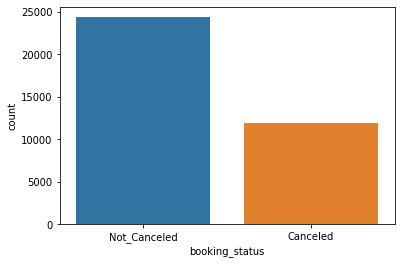

In [6]:
##### Show the dataset is imbalanced or not #####
print('The value counts of booking_status is given below.\n\n')
print(df.loc[:, 'booking_status'].value_counts(),'\n')
print('*'*120)

print('The countplot of this booking_status is given below.\n\n')
sns.countplot(df.loc[:, 'booking_status'])

plt.show()

In [7]:
##### Comments after analysis #####
print('The dataset is quite imbalanced. if recall and precision score would not be impressive then we should go for imbalance to balance technique.')

The dataset is quite imbalanced. if recall and precision score would not be impressive then we should go for imbalance to balance technique.


In [8]:
##### Show the dataset info #####
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
##### Show how many categorial and numberical columns are there #####
def find_dataTypes(df):
  return list(df.dtypes[df.dtypes == 'object'].index), list(df.dtypes[df.dtypes != 'object'].index)

categorical_, numerical_ = find_dataTypes(df)

print(f'The # of categorical features are {len(categorical_)} and the list of this categorical features is {categorical_}\n\n')
print(f'The # of numberical features are {len(numerical_)} and the list of this numberical features is {numerical_}')

The # of categorical features are 5 and the list of this categorical features is ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


The # of numberical features are 14 and the list of this numberical features is ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [10]:
##### Show the counts of this categorical feature #####
for feature_ in categorical_:
  if feature_ == 'Booking_ID':
    pass
  else:
    print('The value counts of this {} is \n\n{}'.format(feature_, df.loc[:, feature_].value_counts()),'\n\n')
    print('*'*120)

The value counts of this type_of_meal_plan is 

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64 


************************************************************************************************************************
The value counts of this room_type_reserved is 

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64 


************************************************************************************************************************
The value counts of this market_segment_type is 

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64 


************************************************************************************************************************
The value coun

The countplot of this type_of_meal_plan is given below.



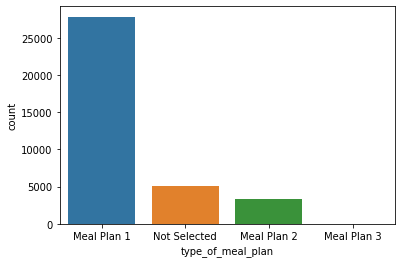

The countplot of this room_type_reserved is given below.



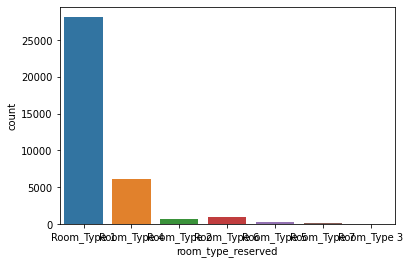

The countplot of this market_segment_type is given below.



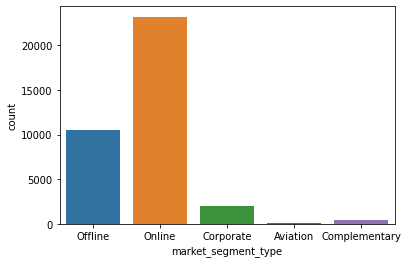

The countplot of this booking_status is given below.



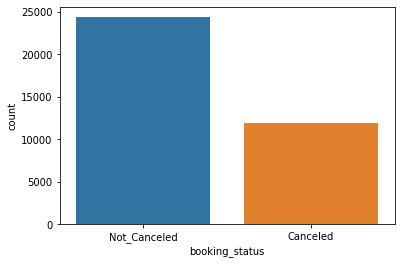

In [11]:
##### Show the value counts of this categorical data #####\
for index_, categorical_ in enumerate(categorical_):
  if categorical_ == 'Booking_ID':
    pass
  else:
    print('The countplot of this {} is given below.\n'.format(categorical_))
    sns.countplot(df.loc[:, categorical_])
    plt.show()

In [12]:
# ##### Drop Booking_ID column from the dataset #####
# df.drop(['Booking_ID'], axis = 1, inplace = True)

# print('Booking_ID column is deleted from the dataset.\n\n')

# ##### Show the dataset #####
# df.head()

The distribution of no_of_adults is given below.



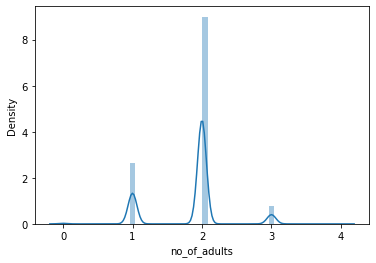

************************************************************************************************************************
The distribution of no_of_adults is given below.



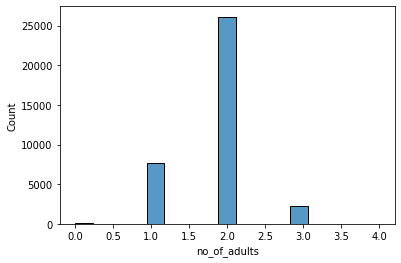

************************************************************************************************************************
The countplot of no_of_adults is given below.



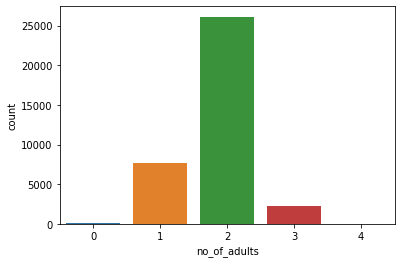

In [13]:
##### Show the distribution of no_of_adults column #####
print('The distribution of no_of_adults is given below.\n')
sns.distplot(df.loc[:, 'no_of_adults'])
plt.show()
print('*'*120)

##### The histogram of this no_of_adults column #####
print('The distribution of no_of_adults is given below.\n')
sns.histplot(df.loc[:, 'no_of_adults'])
plt.show()
print('*'*120)

##### The countplot of this no_of_adults #####
print('The countplot of no_of_adults is given below.\n')
sns.countplot(df.loc[:, 'no_of_adults'])
plt.show()

The distribution of no_of_children is given below.



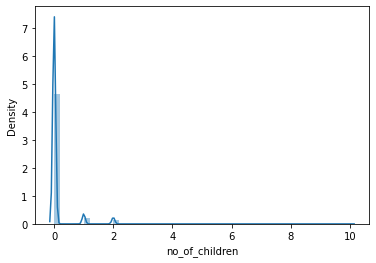

************************************************************************************************************************
The distribution of no_of_children is given below.



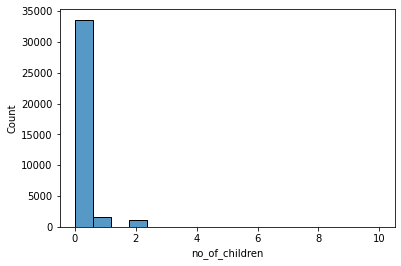

In [14]:
##### Show the distribution of no_of_adults column #####
print('The distribution of no_of_children is given below.\n')
sns.distplot(df.loc[:, 'no_of_children'])
plt.show()
print('*'*120)

##### The histogram of this no_of_children column #####
print('The distribution of no_of_children is given below.\n')
sns.histplot(df.loc[:, 'no_of_children'])
plt.show()

The relationship between no_of_adults and no_of_children is given below.



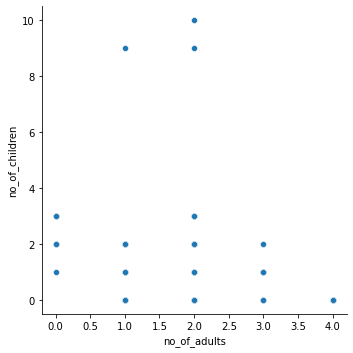

************************************************************************************************************************
The relationship between no_of_adults and no_of_children with booking_status is given below.



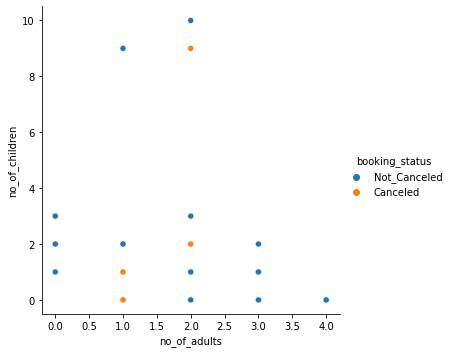

In [15]:
##### The relationship between no_of_adults and no_of_children #####
print('The relationship between no_of_adults and no_of_children is given below.\n')
sns.relplot(x = 'no_of_adults', y = 'no_of_children', data = df)
plt.show()
print('*'*120)

##### The relationship between no_of_adults and no_of_children with booking_status #####
print('The relationship between no_of_adults and no_of_children with booking_status is given below.\n')
sns.relplot(x = 'no_of_adults', y = 'no_of_children', hue = 'booking_status', data = df)
plt.show()

In [16]:
##### Find the min, max, count, sum, mean of number of children by each adults #####
print('the min, max, count, sum, mean of number of children by each adults is given below.\n'.capitalize())
df.groupby(['no_of_adults']).agg({'no_of_children': ['min', 'max', 'count', 'sum', 'mean']})

The min, max, count, sum, mean of number of children by each adults is given below.



no_of_children                           
                        min max  count   sum      mean
no_of_adults                                          
0                         1   3    139   282  2.028777
1                         0   9   7695   205  0.026641
2                         0  10  26108  3305  0.126590
3                         0   2   2317    27  0.011653
4                         0   0     16     0  0.000000

************************************************************************************************************************
The min, max, count, sum, mean of number of children by each adults is given below.



no_of_children                           
                                       min max  count   sum      mean
no_of_adults booking_status                                          
0            Canceled                    2   2     44    88  2.000000
             Not_Canceled                1   3     95   194  2.042105
1            Canceled                    0   2   1856    71  0.038254
             Not_Canceled                0   9   5839   134  0.022949
2            Canceled                    0   9   9119  1313  0.143985
             Not_Canceled                0  10  16989  1992  0.117252
3            Canceled                    0   1    863     6  0.006952
             Not_Canceled                0   2   1454    21  0.014443
4            Canceled                    0   0      3     0  0.000000
             Not_Canceled                0   0     13     0  0.000000

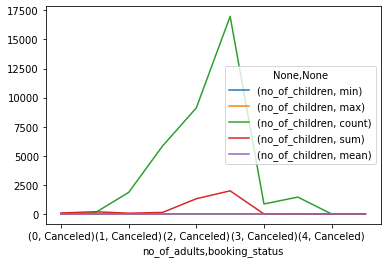

In [17]:
##### Find the min, max, count, sum, mean of number of children by each adults and booking status #####
df.groupby(['no_of_adults', 'booking_status']).agg({'no_of_children': ['min', 'max', 'count', 'sum', 'mean']}).plot()
print('*'*120)

print('the min, max, count, sum, mean of number of children by each adults is given below.\n'.capitalize())
df.groupby(['no_of_adults', 'booking_status']).agg({'no_of_children': ['min', 'max', 'count', 'sum', 'mean']})

The Ditribution Of No_Of_Weekend_Nights Is Given Below 




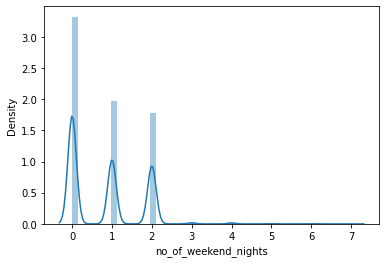

In [18]:
##### Show the distrbution of no_of_weekend_nights #####
print('The ditribution of no_of_weekend_nights is given below'.title(),'\n\n')
sns.distplot(df.loc[:, 'no_of_weekend_nights'])
plt.show()

In [19]:
##### Find the number of booking revervation has been canceled and accpeted by each no_of_weekend_nights #####
print('the number of booking revervation has been canceled and accpeted by each no_of_weekend_nights.'.title(),'\n')
df.groupby(['no_of_weekend_nights']).apply(lambda x: x.loc[:, 'booking_status'].value_counts()).reset_index().loc[3:].set_index(['no_of_weekend_nights', 'level_1'])

The Number Of Booking Revervation Has Been Canceled And Accpeted By Each No_Of_Weekend_Nights. 



booking_status
no_of_weekend_nights level_1                     
1                    Canceled                3432
2                    Not_Canceled            5914
                     Canceled                3157
3                    Not_Canceled              79
                     Canceled                  74
4                    Canceled                  83
                     Not_Canceled              46
5                    Canceled                  29
                     Not_Canceled               5
6                    Canceled                  16
                     Not_Canceled               4
7                    Canceled                   1

In [20]:
##### Find the number of adults that is canceled or accepted the booking by each no_of_weekend_nights #####
df.pivot_table(index = 'no_of_weekend_nights', columns = 'booking_status', values = 'no_of_adults', aggfunc = ['sum', 'count', 'mean'], margins = True)

sum                        count               \
booking_status       Canceled Not_Canceled    All Canceled Not_Canceled   
no_of_weekend_nights                                                      
0                      9639.0      20424.0  30063   5093.0      11779.0   
1                      6696.0      12094.0  18790   3432.0       6563.0   
2                      6012.0      11465.0  17477   3157.0       5914.0   
3                       139.0        146.0    285     74.0         79.0   
4                       146.0         87.0    233     83.0         46.0   
5                        41.0          9.0     50     29.0          5.0   
6                        20.0          6.0     26     16.0          4.0   
7                         2.0          NaN      2      1.0          NaN   
All                   22695.0      44231.0  66926  11885.0      24390.0   

                                 mean                         
booking_status          All  Canceled Not_Canceled       All  
no_of_weekend_nights                                          
0                     16872  1.892598     1.733933  1.781828  
1                      9995  1.951049     1.842755  1.879940  
2                      9071  1.904340     1.938620  1.926689  
3                       153  1.878378     1.848101  1.862745  
4                       129  1.759036     1.891304  1.806202  
5                        34  1.413793     1.800000  1.470588  
6                        20  1.250000     1.500000  1.300000  
7                         1  2.000000          NaN  2.000000  
All                   36275  1.909550     1.813489  1.844962

In [21]:
##### Find the number of adults that is canceled or accepted the booking by each no_of_weekend_nights and no_of_children, which greater than 5 #####
print('the number of adults that is canceled or accepted the booking by each no_of_weekend_nights and no_of_children, which greater than 5 is gien below.\n'.title())

dummy_df = df[df.loc[:, 'no_of_children'] > 5]
dummy_df.pivot_table(index = 'no_of_weekend_nights', columns = ['booking_status', 'no_of_children'], values = 'no_of_adults', aggfunc = ['sum', 'count', 'mean'], margins = True)

The Number Of Adults That Is Canceled Or Accepted The Booking By Each No_Of_Weekend_Nights And No_Of_Children, Which Greater Than 5 Is Gien Below.



sum                          count               \
booking_status       Canceled Not_Canceled      All Canceled Not_Canceled   
no_of_children              9            9   10            9            9   
no_of_weekend_nights                                                        
0                         NaN          NaN  2.0   2      NaN          NaN   
2                         2.0          1.0  NaN   3      1.0          1.0   
All                       2.0          1.0  2.0   5      1.0          1.0   

                                  mean                              
booking_status            All Canceled Not_Canceled            All  
no_of_children         10            9            9   10            
no_of_weekend_nights                                                
0                     1.0   1      NaN          NaN  2.0  2.000000  
2                     NaN   2      2.0          1.0  NaN  1.500000  
All                   1.0   3      2.0          1.0  2.0  1.666667

The relationship of no_of_weekend_nights and no_of_week_nights is given below.



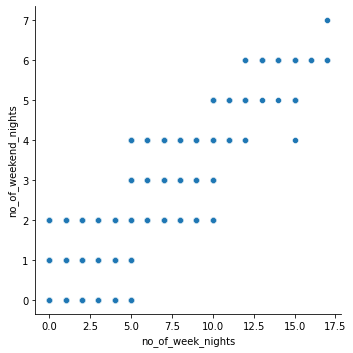

************************************************************************************************************************
The relationship of no_of_weekend_nights and no_of_week_nights  with booking status is given below.



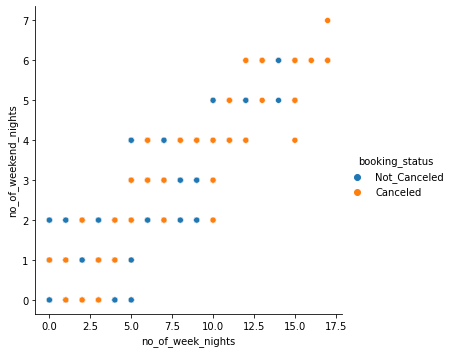

In [22]:
##### Show the relationship of no_of_weekend_nights and no_of_week_nights #####
print('the relationship of no_of_weekend_nights and no_of_week_nights is given below.\n'.capitalize())
sns.relplot(x = 'no_of_week_nights', y = 'no_of_weekend_nights', data = df)
plt.show()
print('*'*120)

##### Show the relationship of no_of_weekend_nights and no_of_week_nights with booking status#####
print('the relationship of no_of_weekend_nights and no_of_week_nights  with booking status is given below.\n'.capitalize())
sns.relplot(x = 'no_of_week_nights', y = 'no_of_weekend_nights', hue = 'booking_status', data = df)
plt.show()

In [23]:
##### Find the number of booking revervation has been canceled and accpeted by each no_of_week_nights #####
def find_query(group):
  return group['booking_status'].value_counts()

df.groupby(['no_of_week_nights']).apply(find_query).reset_index().set_index(['no_of_week_nights', 'level_1']).loc[2:].head()

booking_status
no_of_week_nights level_1                     
2                 Not_Canceled            7447
                  Canceled                3997
3                 Not_Canceled            5265
                  Canceled                2574
4                 Not_Canceled            1847

In [24]:
##### Fina the type of meals that has been booked based on adults #####
df.pivot_table(index = ['type_of_meal_plan'], columns = ['no_of_adults'], values = 'booking_status', aggfunc = ['count'])

count                               
no_of_adults           0       1        2       3     4
type_of_meal_plan                                      
Meal Plan 1        137.0  6469.0  19050.0  2163.0  16.0
Meal Plan 2          2.0   535.0   2645.0   123.0   NaN
Meal Plan 3          NaN     NaN      5.0     NaN   NaN
Not Selected         NaN   691.0   4408.0    31.0   NaN

In [25]:
##### Fina the type of meals that has been booked based on adults and children #####
df.pivot_table(index = ['type_of_meal_plan'], columns = ['no_of_adults', 'no_of_children'], values = 'booking_status', aggfunc = ['count'], margins = True)

count                                                        \
no_of_adults          0                   1                         2           
no_of_children        1      2    3       0     1     2    9        0       1   
type_of_meal_plan                                                               
Meal Plan 1         1.0  132.0  4.0  6356.0  64.0  48.0  1.0  16910.0  1333.0   
Meal Plan 2         NaN    1.0  1.0   522.0  10.0   3.0  NaN   2490.0    95.0   
Meal Plan 3         NaN    NaN  NaN     NaN   NaN   NaN  NaN      5.0     NaN   
Not Selected        NaN    NaN  NaN   673.0  16.0   2.0  NaN   4314.0    74.0   
All                 1.0  133.0  5.0  7551.0  90.0  53.0  1.0  23719.0  1502.0   

                                                                          
no_of_adults                                   3                4    All  
no_of_children         2     3    9   10       0     1    2     0         
type_of_meal_plan                                                         
Meal Plan 1        793.0  12.0  1.0  1.0  2138.0  24.0  1.0  16.0  27835  
Meal Plan 2         58.0   2.0  NaN  NaN   122.0   1.0  NaN   NaN   3305  
Meal Plan 3          NaN   NaN  NaN  NaN     NaN   NaN  NaN   NaN      5  
Not Selected        20.0   NaN  NaN  NaN    31.0   NaN  NaN   NaN   5130  
All                871.0  14.0  1.0  1.0  2291.0  25.0  1.0  16.0  36275

In [26]:
##### Find the # number of meals, total number of meals, average number of meals that has been booked by the adults #####
print('the # number of meals, total number of meals, average number of meals that has been booked by the adults is given below.\n\n'.capitalize())
df1 = df.copy()
df1.loc[:, 'type_of_meal_plan'] = df1.loc[:, 'type_of_meal_plan'].map({'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3, 'Not Selected': 4})
df1.loc[:, 'booking_status'] = df1.loc[:, 'booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
df1.pivot_table(index = 'no_of_adults', columns = ['type_of_meal_plan'], values = 'booking_status', aggfunc = ['count', 'sum', 'mean'], fill_value = 0)

The # number of meals, total number of meals, average number of meals that has been booked by the adults is given below.




count                  sum                     mean  \
type_of_meal_plan      1     2  3     4     1     2  3     4         1   
no_of_adults                                                             
0                    137     2  0     0    44     0  0     0  0.321168   
1                   6469   535  0   691  1639    76  0   141  0.253362   
2                  19050  2645  5  4408  6185  1380  1  1553  0.324672   
3                   2163   123  0    31   808    50  0     5  0.373555   
4                     16     0  0     0     3     0  0     0  0.187500   

                                            
type_of_meal_plan         2    3         4  
no_of_adults                                
0                  0.000000  0.0  0.000000  
1                  0.142056  0.0  0.204052  
2                  0.521739  0.2  0.352314  
3                  0.406504  0.0  0.161290  
4                  0.000000  0.0  0.000000

the distribution of required_car_parking_space is given below.



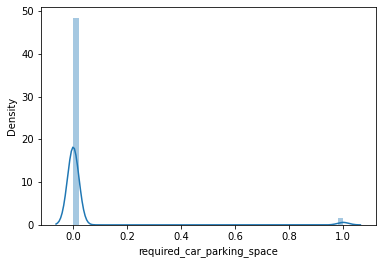

************************************************************************************************************************
The countplot of this feature is given below.



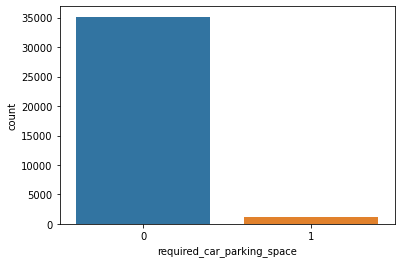

************************************************************************************************************************
It is clearly see that, the requirement of parking cars not required too much.


In [27]:
##### Show the distribution of required_car_parking_space #####
print('the distribution of required_car_parking_space is given below.\n')
sns.distplot(df.loc[:, 'required_car_parking_space'])
plt.show()
print('*'*120)

print('The countplot of this feature is given below.\n')
sns.countplot(df.loc[:, 'required_car_parking_space'])
plt.show()
print('*'*120)

##### Comments after analyse #####
print("It is clearly see that, the requirement of parking cars not required too much.")

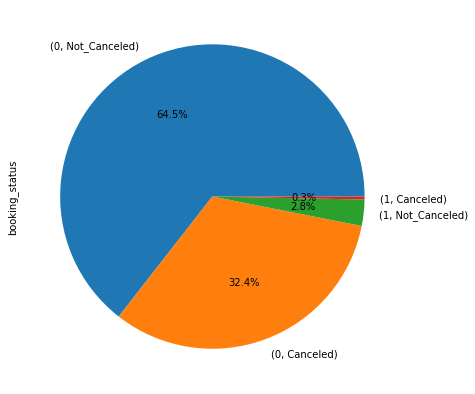

In [28]:
##### Find how many reservation has been done as per booking_status #####
plt.figure(figsize = (8, 7))
df.groupby(['required_car_parking_space'])['booking_status'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

In [29]:
##### the car parking ratio by adults each #####
def find_query(group):
  return group['no_of_adults'].value_counts(ascending = False)

df.groupby(['required_car_parking_space']).apply(find_query)

no_of_adults                    2     1     3    0   4
required_car_parking_space                            
0                           25325  7457  2216  138  15
1                             783   238   101    1   1

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: booking_status, dtype: int64
************************************************************************************************************************
Show which room has been booked highest 



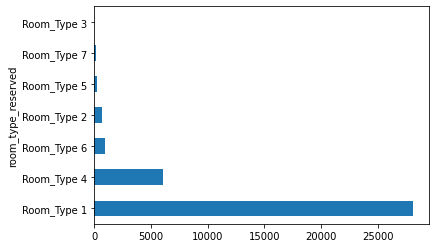

In [30]:
##### Find a query, show which room has been booked highest #####
print(df.groupby(['room_type_reserved'])['booking_status'].count().sort_values(ascending = False))
print('*'*120)
print('show which room has been booked highest'.capitalize(),'\n')
df.groupby(['room_type_reserved'])['booking_status'].count().sort_values(ascending = False).plot(kind = 'barh')

In [31]:
##### Find a query, show which adults most canceled and accepted the hotel reservation based on type of room #####
df.groupby(['room_type_reserved', 'no_of_adults'])[['booking_status']].count().sort_values(by = 'booking_status', ascending = False).head()

booking_status
room_type_reserved no_of_adults                
Room_Type 1        2                      20710
                   1                       6936
Room_Type 4        2                       3746
                   3                       1737
Room_Type 6        2                        882

In [32]:
##### Show, based on no_of_weekend_nights which and how many rooms have been booked ####
df1.pivot_table(index = 'room_type_reserved', columns = 'no_of_weekend_nights', values = 'booking_status', aggfunc = ['count', 'sum'], fill_value = 0)

count                                   sum              \
no_of_weekend_nights      0     1     2    3   4   5   6  7     0     1     2   
room_type_reserved                                                              
Room_Type 1           13493  7732  6685  102  77  26  14  1  3992  2655  2296   
Room_Type 2             286   173   229    4   0   0   0  0   108    43    74   
Room_Type 3               3     4     0    0   0   0   0  0     0     2     0   
Room_Type 4            2456  1705  1807   38  39   7   5  0   800   590   627   
Room_Type 5             125    86    50    3   0   0   1  0    25    32    12   
Room_Type 6             432   248   267    6  12   1   0  0   156    99   136   
Room_Type 7              77    47    33    0   1   0   0  0    12    11    12   

                                         
no_of_weekend_nights   3   4   5   6  7  
room_type_reserved                       
Room_Type 1           51  44  23  10  1  
Room_Type 2            3   0   0   0  0  
Room_Type 3            0   0   0   0  0  
Room_Type 4           13  29   5   5  0  
Room_Type 5            2   0   0   1  0  
Room_Type 6            5   9   1   0  0  
Room_Type 7            0   1   0   0  0

In [33]:
df.loc[:, 'room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [34]:
##### Find, which room has mostly booked depending on the no_of_adults and children #####
plt.figure(figsize = (10, 12))

def find_query(group):
  return group['room_type_reserved'].value_counts(ascending = False).head(1)

df.groupby(['no_of_adults', 'no_of_children']).apply(find_query).reset_index().set_index('no_of_adults', 'no_of_children', 'lavel_1')

no_of_children      level_2  room_type_reserved
   no_of_adults                                                 
0  0                          1  Room_Type 2                   1
1  0                          2  Room_Type 2                 128
2  0                          3  Room_Type 2                   4
3  1                          0  Room_Type 1                6847
4  1                          1  Room_Type 1                  74
5  1                          2  Room_Type 6                  25
6  1                          9  Room_Type 1                   1
7  2                          0  Room_Type 1               19458
8  2                          1  Room_Type 1                1234
9  2                          2  Room_Type 6                 749
10 2                          3  Room_Type 7                   8
11 2                          9  Room_Type 2                   1
12 2                         10  Room_Type 4                   1
13 3                          0  Room_Type 4                1731
14 3                          1  Room_Type 7                   9
15 3                          2  Room_Type 2                   1
16 4                          0  Room_Type 7                  13

<Figure size 720x864 with 0 Axes>

In [35]:
##### Find, the number of room reserved based on adults and children #####
df1.pivot_table(index = ['no_of_adults'], columns = 'no_of_children', values = 'room_type_reserved', aggfunc='count')

no_of_children       0       1      2     3    9    10
no_of_adults                                          
0                   NaN     1.0  133.0   5.0  NaN  NaN
1                7551.0    90.0   53.0   NaN  1.0  NaN
2               23719.0  1502.0  871.0  14.0  1.0  1.0
3                2291.0    25.0    1.0   NaN  NaN  NaN
4                  16.0     NaN    NaN   NaN  NaN  NaN

The distribution of lead_time is given below.



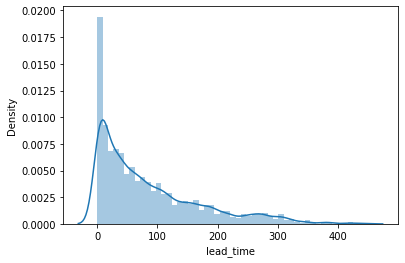

In [36]:
##### Show the distribution of lead_time #####
print('the distribution of lead_time is given below.\n'.capitalize())
sns.distplot(df.loc[:, 'lead_time'])
plt.show()

The relationship of no_of_adults and lead time is given below.



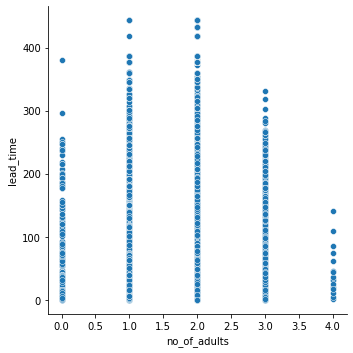

************************************************************************************************************************
The relationship of no_of_adults and lead time with booking status is given below.



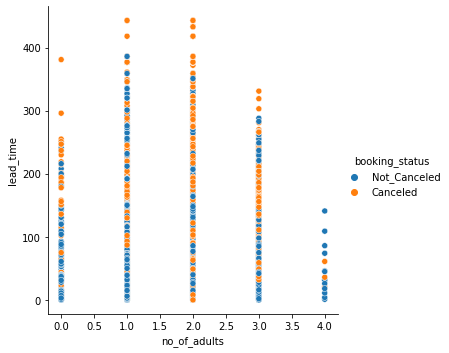

************************************************************************************************************************
The relationship of no_of_adults, lead time, and no_of_weekend_nights with booking status is given below.



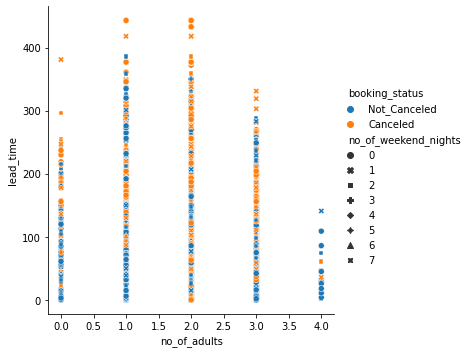

In [37]:
##### Show the distribution of no_of_adults and lead time #####
print('The relationship of no_of_adults and lead time is given below.\n')
sns.relplot(x = 'no_of_adults', y = 'lead_time', data = df)
plt.show()
print('*'*120)

##### Show the distribution of no_of_adults and lead time with booking status#####
print('The relationship of no_of_adults and lead time with booking status is given below.\n')
sns.relplot(x = 'no_of_adults', y = 'lead_time', hue = 'booking_status', data = df)
plt.show()
print('*'*120)

##### Show the distribution of no_of_adults, lead time, and no_of_weekend_nights with booking status#####
print('The relationship of no_of_adults, lead time, and no_of_weekend_nights with booking status is given below.\n')
sns.relplot(x = 'no_of_adults', y = 'lead_time', hue = 'booking_status', style = 'no_of_weekend_nights', data = df)
plt.show()

The ditribution of year is given below.



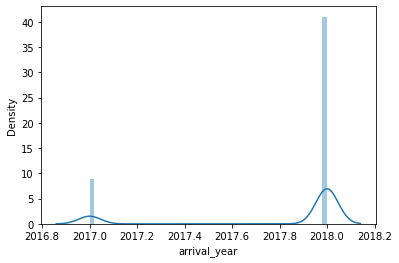

In [38]:
##### Show the ditribution of year #####
print('the ditribution of year is given below.\n'.capitalize())
sns.distplot(df.loc[:, 'arrival_year'])
plt.show()

In [39]:
##### Find, in which year most of the reservation is done #####
def find_query(group):
  return group['booking_status'].value_counts()

df.groupby(['arrival_year']).apply(find_query)

booking_status  Not_Canceled  Canceled
arrival_year                          
2017                    5553       961
2018                   18837     10924

The Distribution Of Arrival_Month 



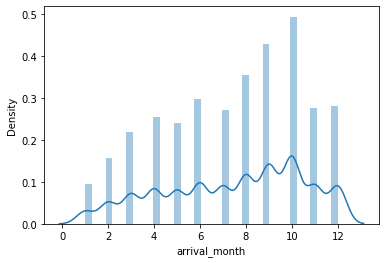

In [40]:
##### Find the distribution of arrival_month #####
print('The distribution of arrival_month'.title(),'\n')
sns.distplot(df.loc[:, 'arrival_month'])
plt.show()

In [41]:
##### Find out, in which month the reservation is done mostly #####
print('It is clearly see that, on October most of the hotel reservation was done.\n')
df.groupby(['arrival_month'])[['booking_status']].count().sort_values(by = 'booking_status', ascending = False).head()

It is clearly see that, on October most of the hotel reservation was done.



booking_status
arrival_month                
10                       5317
9                        4611
8                        3813
6                        3203
12                       3021

In [42]:
##### Find out, in which year and month the resevation is done #####
df.groupby(['arrival_year', 'arrival_month'])[['booking_status']].count().sort_values(by = 'booking_status', ascending = False)

booking_status
arrival_year arrival_month                
2018         10                       3404
             6                        3203
             9                        2962
             8                        2799
             4                        2736
             5                        2598
             7                        2557
             3                        2358
             11                       2333
             12                       2093
2017         10                       1913
2018         2                        1704
2017         9                        1649
             8                        1014
2018         1                        1014
2017         12                        928
             11                        647
             7                         363

In [43]:
##### Find out the ratio, in which year and month the resevation is done #####
print('It is clearly see that, on October, 2018 most of the reservation is done.\n\n')
print('*'*120)

##### Query is given below #####
df1.groupby(['arrival_year', 'arrival_month']).\
                                              agg({'booking_status': ['count', 'sum', 'mean']}).\
                                              sort_values([('booking_status', 'count'), 
                                              ('booking_status', 'sum'),
                                              ('booking_status', 'mean')],
                                               ascending = [False, False, False])

It is clearly see that, on October, 2018 most of the reservation is done.


************************************************************************************************************************


booking_status                
                                    count   sum      mean
arrival_year arrival_month                               
2018         10                      3404  1578  0.463572
             6                       3203  1291  0.403060
             9                       2962  1356  0.457799
             8                       2799  1303  0.465523
             4                       2736   995  0.363670
             5                       2598   948  0.364896
             7                       2557  1071  0.418850
             3                       2358   700  0.296862
             11                      2333   848  0.363480
             12                      2093   380  0.181558
2017         10                      1913   302  0.157867
2018         2                       1704   430  0.252347
2017         9                       1649   182  0.110370
             8                       1014   185  0.182446
2018         1                       1014    24  0.023669
2017         12                       928    22  0.023707
             11                       647    27  0.041731
             7                        363   243  0.669421

In [44]:
##### Find in Which year and month total the number of visitors did the reservation #####
df1['total_visitors'] = df1.loc[:, 'no_of_adults'] + df1.loc[:, 'no_of_children']

df1.pivot_table(index = ['arrival_year', 'arrival_month'], columns = 'total_visitors',\
                values = 'booking_status', aggfunc = ['count', 'sum'], margins = True,\
                fill_value = 0).sort_index(ascending = False)

count                                         sum  \
total_visitors                 1      2     3    4   5 10 11 12    All     1   
arrival_year arrival_month                                                     
All                         7552  23942  3851  912  15  1  1  1  36275  1809   
2018         12              309   1367   337   79   1  0  0  0   2093    26   
             11              616   1547   147   23   0  0  0  0   2333   223   
             10              754   2241   342   67   0  0  0  0   3404   286   
             9               485   2133   266   78   0  0  0  0   2962   124   
             8               182   1803   667  141   6  0  0  0   2799    53   
             7               335   1486   624  110   2  0  0  0   2557   115   
             6               899   1983   276   45   0  0  0  0   3203   291   
             5               540   1765   230   63   0  0  0  0   2598   153   
             4               444   1919   285   88   0  0  0  0   2736   171   
             3               426   1601   279   51   1  0  0  0   2358    70   
             2               569    951   148   35   1  0  0  0   1704   181   
             1               371    598    31   13   0  0  0  1   1014     3   
2017         12              177    679    52   18   2  0  0  0    928     2   
             11              242    387    15    3   0  0  0  0    647     9   
             10              560   1277    49   26   0  1  0  0   1913    38   
             9               418   1163    42   26   0  0  0  0   1649    19   
             8               150    772    44   45   2  0  1  0   1014    22   
             7                75    270    17    1   0  0  0  0    363    23   

                                                                
total_visitors                 2     3    4  5 10 11 12    All  
arrival_year arrival_month                                      
All                         8280  1392  398  5  0  1  0  11885  
2018         12              253    80   21  0  0  0  0    380  
             11              562    53   10  0  0  0  0    848  
             10             1082   167   43  0  0  0  0   1578  
             9              1088   106   38  0  0  0  0   1356  
             8               808   366   73  3  0  0  0   1303  
             7               674   224   56  2  0  0  0   1071  
             6               875   102   23  0  0  0  0   1291  
             5               682    79   34  0  0  0  0    948  
             4               692    88   44  0  0  0  0    995  
             3               513    89   28  0  0  0  0    700  
             2               214    20   15  0  0  0  0    430  
             1                17     0    4  0  0  0  0     24  
2017         12               19     1    0  0  0  0  0     22  
             11               16     2    0  0  0  0  0     27  
             10              262     1    1  0  0  0  0    302  
             9               156     4    3  0  0  0  0    182  
             8               152     5    5  0  0  1  0    185  
             7               215     5    0  0  0  0  0    243

In [45]:
##### Find out in which year and month how many vistors are reserved the hotel based on their booking status #####
df1.groupby(['arrival_year', 'arrival_month', 'booking_status'])[['total_visitors']].agg({'total_visitors': ['count', 'sum', 'mean']})

total_visitors                
                                                   count   sum      mean
arrival_year arrival_month booking_status                               
2017         7             0                         120   202  1.683333
                           1                         243   468  1.925926
             8             0                         829  1655  1.996381
                           1                         185   372  2.010811
             9             0                        1467  2619  1.785276
                           1                         182   355  1.950549
             10            0                        1611  2806  1.741775
                           1                         302   569  1.884106
             11            0                         620  1026  1.654839
                           1                          27    47  1.740741
             12            0                         906  1730  1.909492
                           1                          22    43  1.954545
2018         1             0                         990  1671  1.687879
                           1                          24    53  2.208333
             2             0                        1274  2331  1.829670
                           1                         430   729  1.695349
             3             0                        1658  3199  1.929433
                           1                         700  1475  2.107143
             4             0                        1741  3494  2.006893
                           1                         995  1995  2.005025
             5             0                        1650  3122  1.892121
                           1                         948  1890  1.993671
             6             0                        1912  3434  1.796025
                           1                        1291  2439  1.889233
             7             0                        1486  3260  2.193809
                           1                        1071  2369  2.211951
             8             0                        1496  3309  2.211898
                           1                        1303  3074  2.359171
             9             0                        1606  3091  1.924658
                           1                        1356  2770  2.042773
             10            0                        1826  3407  1.865827
                           1                        1578  3123  1.979087
             11            0                        1485  2697  1.816162
                           1                         848  1546  1.823113
             12            0                        1713  3519  2.054291
                           1                         380   856  2.252632

In [46]:
##### Find out, which type of room has been reserved based on arrival year and month #####
df.pivot_table(index = ['arrival_year', 'arrival_month'], columns = 'room_type_reserved',\
               values = 'booking_status', aggfunc = 'count', fill_value = 0).\
               sort_values([('Room_Type 1'), ('Room_Type 2'), ('Room_Type 3'), ('Room_Type 4'),
                            ('Room_Type 5'), ('Room_Type 6'), ('Room_Type 7')],\
                            ascending = [False, False, False, False, False, False, False])

room_type_reserved          Room_Type 1  Room_Type 2  Room_Type 3  \
arrival_year arrival_month                                          
2018         6                     2596           36            1   
             10                    2576           37            2   
             9                     2112           46            0   
             11                    2008           17            1   
             4                     1998           44            0   
             8                     1910           74            0   
             5                     1883           24            0   
             3                     1807           64            0   
             7                     1774           66            0   
2017         10                    1634           34            1   
2018         12                    1563           36            0   
2017         9                     1518            6            0   
2018         2                     1384           51            0   
2017         8                      920           26            0   
2018         1                      864           50            0   
2017         12                     746           61            2   
             11                     484           14            0   
             7                      353            6            0   

room_type_reserved          Room_Type 4  Room_Type 5  Room_Type 6  Room_Type 7  
arrival_year arrival_month                                                      
2018         6                      494           15           52            9  
             10                     644           37           88           20  
             9                      649           43           95           17  
             11                     252           14           38            3  
             4                      578           15           93            8  
             8                      647           23          119           26  
             5                      572           22           82           15  
             3                      420           12           48            7  
             7                      582           26           88           21  
2017         10                     211            1           30            2  
2018         12                     382           15           86           11  
2017         9                       87            8           29            1  
2018         2                      211           20           33            5  
2017         8                       11            4           53            0  
2018         1                       82            3           12            3  
2017         12                      91            4           16            8  
             11                     141            2            4            2  
             7                        3            1            0            0

In [47]:
##### Find out, which meal was the popular by the customer who booked the hotel #####
df.groupby(['arrival_year', 'arrival_month', 'booking_status'])['type_of_meal_plan'].value_counts().sort_values(ascending = False).head(20)

arrival_year  arrival_month  booking_status  type_of_meal_plan
2018          6              Not_Canceled    Meal Plan 1          1558
              10             Not_Canceled    Meal Plan 1          1463
2017          10             Not_Canceled    Meal Plan 1          1387
2018          4              Not_Canceled    Meal Plan 1          1368
              5              Not_Canceled    Meal Plan 1          1322
              3              Not_Canceled    Meal Plan 1          1320
              12             Not_Canceled    Meal Plan 1          1290
              9              Not_Canceled    Meal Plan 1          1204
              10             Canceled        Meal Plan 1          1156
              7              Not_Canceled    Meal Plan 1          1155
              8              Not_Canceled    Meal Plan 1          1144
              11             Not_Canceled    Meal Plan 1          1126
              2              Not_Canceled    Meal Plan 1          1074
2017          

In [48]:
##### Find out, max, count, and sum based on their booking status and arrival year with month #####
df.groupby(['arrival_year', 'arrival_month', 'booking_status']).\
                                                                agg({'no_of_weekend_nights': ['max', 'count', 'sum'],\
                                                                     'no_of_week_nights': ['max', 'min', 'sum']}).\
                                                                      sort_values([('no_of_weekend_nights',   'max'),
                                                                      ('no_of_weekend_nights', 'count'),
                                                                      ('no_of_weekend_nights',   'sum'),
                                                                      (   'no_of_week_nights',   'max'),
                                                                      (   'no_of_week_nights',   'min'),
                                                                      (   'no_of_week_nights',   'sum')],\
                                                                      ascending = [False, False, False, False, False, False])

no_of_weekend_nights              \
                                                           max count   sum   
arrival_year arrival_month booking_status                                    
2018         7             Canceled                          7  1071  1100   
             12            Not_Canceled                      6  1713  1487   
             10            Canceled                          6  1578  1516   
             8             Canceled                          6  1303  1192   
             4             Canceled                          6   995   913   
             1             Not_Canceled                      6   990   761   
             5             Canceled                          6   948   790   
             11            Canceled                          6   848   596   
             3             Canceled                          6   700   674   
             2             Canceled                          6   430   539   
2017         10            Canceled                          6   302   193   
2018         8             Not_Canceled                      5  1496  1353   
             9             Canceled                          5  1356  1096   
             12            Canceled                          5   380   422   
2017         7             Canceled                          5   243   241   
             8             Canceled                          5   185   254   
2018         6             Not_Canceled                      4  1912  1144   
             10            Not_Canceled                      4  1826  1479   
             4             Not_Canceled                      4  1741  1481   
             3             Not_Canceled                      4  1658  1315   
             5             Not_Canceled                      4  1650  1299   
             9             Not_Canceled                      4  1606  1324   
             7             Not_Canceled                      4  1486  1405   
             11            Not_Canceled                      4  1485  1135   
2017         9             Not_Canceled                      4  1467   883   
2018         6             Canceled                          4  1291   842   
             2             Not_Canceled                      4  1274   920   
2017         12            Not_Canceled                      4   906   693   
             8             Not_Canceled                      4   829   571   
             12            Canceled                          4    22    20   
             10            Not_Canceled                      3  1611  1123   
             11            Not_Canceled                      3   620   378   
             9             Canceled                          3   182   136   
             7             Not_Canceled                      3   120   110   
             11            Canceled                          2    27     8   
2018         1             Canceled                          2    24    16   

                                          no_of_week_nights            
                                                        max min   sum  
arrival_year arrival_month booking_status                              
2018         7             Canceled                      17   0  2740  
             12            Not_Canceled                  15   0  4084  
             10            Canceled                      17   0  3321  
             8             Canceled                      13   0  3494  
             4             Canceled                      15   0  2091  
             1             Not_Canceled                  17   0  1953  
             5             Canceled                      13   0  2310  
             11            Canceled                      14   0  2195  
             3             Canceled                      16   0  1754  
             2             Canceled                      16   0   938  
2017         10            Canceled                      13   0

The realtionship of market_segment_type and booking status is given below.



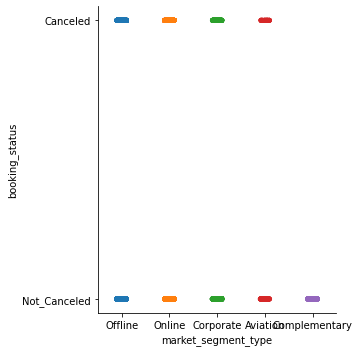

In [49]:
##### The realtionship of market_segment_type and booking status #####
print('The realtionship of market_segment_type and booking status is given below.\n')
sns.catplot(x = 'market_segment_type', y = 'booking_status', data = df)
plt.show()

arrival_year  market_segment_type
2017          Online                  2951
              Offline                 2926
              Corporate                498
              Complementary            139
2018          Online                 20263
              Offline                 7602
              Corporate               1519
              Complementary            252
              Aviation                 125
Name: market_segment_type, dtype: int64 



It is clearly see that, in 2018, the market_segment_type of ONLINE is quite popular.




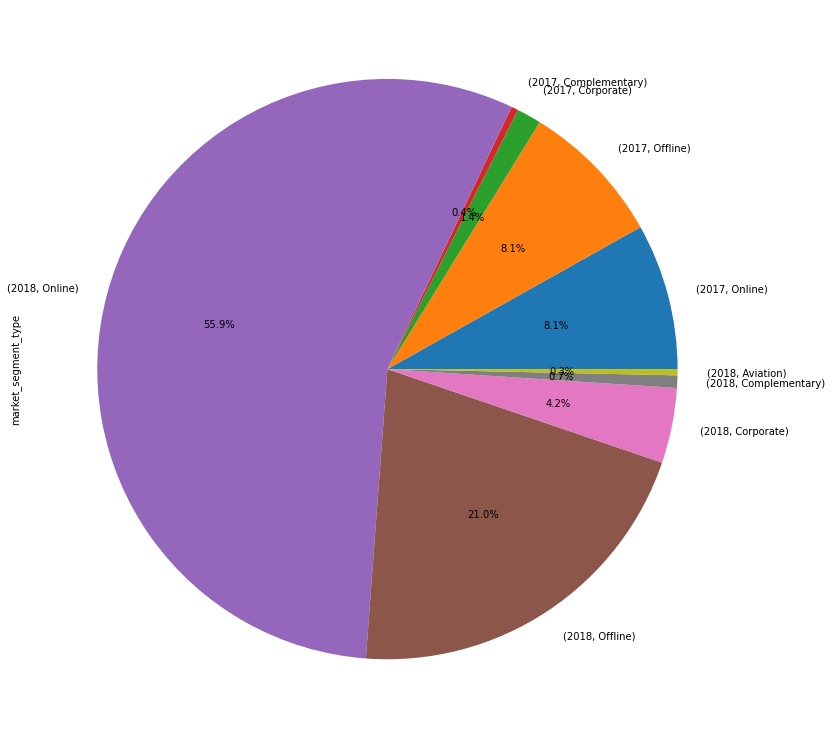

In [50]:
##### Find out, in Which year, which market_segment_type was popular #####
print(df.groupby(['arrival_year'])['market_segment_type'].value_counts(ascending = False),'\n\n\n')
print('It is clearly see that, in 2018, the market_segment_type of ONLINE is quite popular.\n\n')
plt.figure(figsize = (13, 25))
df.groupby(['arrival_year'])['market_segment_type'].value_counts(ascending = False).plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

The countplot of the repeated_guest is given below.




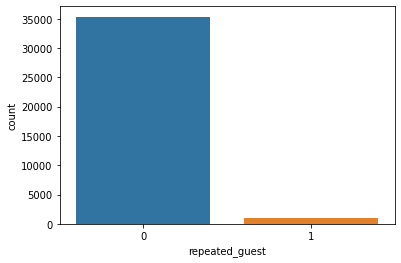

In [51]:
##### Show how many repeated_guest ####
print('The countplot of the repeated_guest is given below.\n\n')
sns.countplot(df.loc[:, 'repeated_guest'])
plt.show()

In [52]:
##### Find out, in which year total number of repeated_guest is come #####
df.groupby(['arrival_year']).agg({'repeated_guest': ['count', 'sum']})

repeated_guest     
                      count  sum
arrival_year                    
2017                   6514  207
2018                  29761  723

In [53]:
##### Find out, in which year total number of repeated_guest is come #####
df.groupby(['arrival_year', 'arrival_month']).agg({'repeated_guest': ['count', 'sum']}).\
                                              sort_values(by = [('repeated_guest', 'count'),
                                                                ('repeated_guest',   'sum')],\
                                                                 ascending = [False, False])

repeated_guest    
                                    count sum
arrival_year arrival_month                   
2018         10                      3404  69
             6                       3203  55
             9                       2962  69
             8                       2799  11
             4                       2736  50
             5                       2598  63
             7                       2557  40
             3                       2358  75
             11                      2333  76
             12                      2093  82
2017         10                      1913  74
2018         2                       1704  59
2017         9                       1649  39
2018         1                       1014  74
2017         8                       1014   9
             12                       928  51
             11                       647  34
             7                        363   0

The Countplot Of No_Of_Previous_Bookings_Not_Canceled


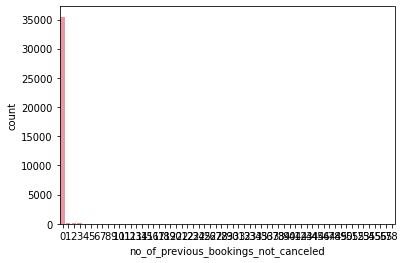

In [54]:
##### Show the countplot of no_of_previous_bookings_not_canceled #####
print(' the countplot of no_of_previous_bookings_not_canceled\n\n'.strip().title())
sns.countplot(df.loc[:, 'no_of_previous_bookings_not_canceled'])
plt.show()

In [55]:
##### In which year and month the previous cancelation occurs high #####
df.groupby(['arrival_year', 'arrival_month'])[['no_of_previous_bookings_not_canceled']].count().sort_values(by = 'no_of_previous_bookings_not_canceled',\
                                                                                                            ascending = False)

no_of_previous_bookings_not_canceled
arrival_year arrival_month                                      
2018         10                                             3404
             6                                              3203
             9                                              2962
             8                                              2799
             4                                              2736
             5                                              2598
             7                                              2557
             3                                              2358
             11                                             2333
             12                                             2093
2017         10                                             1913
2018         2                                              1704
2017         9                                              1649
             8                                              1014
2018         1                                              1014
2017         12                                              928
             11                                              647
             7                                               363

The distribution of avg_price_per_room is given below.



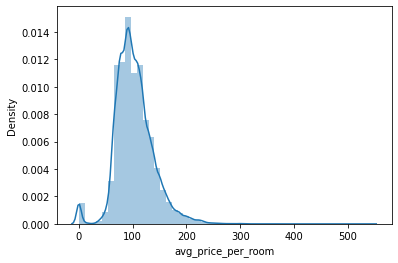

In [56]:
##### Show the distribution of avg_price_per_room #####
print('The distribution of avg_price_per_room is given below.\n')
sns.distplot(df.loc[:, 'avg_price_per_room'])
plt.show()

The relationship of no_of_adults and avg_price_per_room is given below.



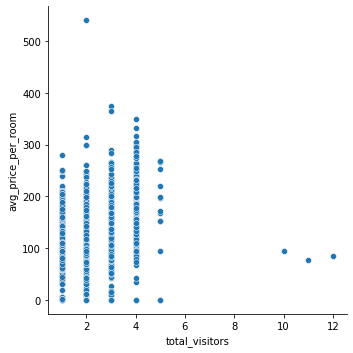

The relationship of no_of_adults and avg_price_per_room with booking_status is given below.



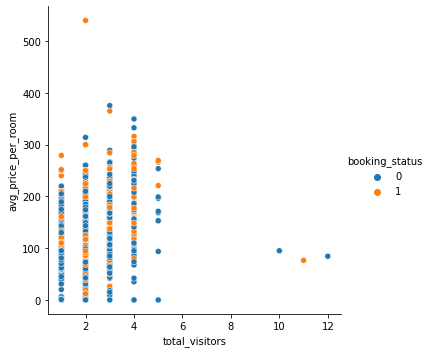

In [57]:
##### Show the relationship no_of_adults and avg_price_per_room	 #####
print('The relationship of no_of_adults and avg_price_per_room is given below.\n')
sns.relplot(x = 'total_visitors', y = 'avg_price_per_room', data = df1)
plt.show()

##### Show the relationship no_of_adults and avg_price_per_room	 with booking_status #####
print('The relationship of no_of_adults and avg_price_per_room with booking_status is given below.\n')
sns.relplot(x = 'total_visitors', y = 'avg_price_per_room', hue = 'booking_status', data = df1)
plt.show()

In [58]:
##### Find out, the average price per room based on year and month #####
df.groupby(['arrival_year', 'arrival_month'])[['avg_price_per_room']].mean().sort_values(by = 'avg_price_per_room')

avg_price_per_room
arrival_year arrival_month                    
2017         11                      72.339104
2018         1                       74.749763
2017         12                      75.430463
2018         2                       80.733644
2017         7                       84.890468
             8                       91.091400
2018         3                       91.883698
2017         10                      92.032002
2018         12                      94.947482
             11                      96.539721
             4                      101.998801
2017         9                      103.335185
2018         10                     111.445723
             6                      111.966500
             5                      113.810677
             7                      115.448092
             8                      121.214759
             9                      122.905831

In [59]:
##### Find out, those year and month where per room price was minimum but customer canceled the reservation #####
def find_query(group):
  return group[group['avg_price_per_room'] > 0]['avg_price_per_room'].min()

dummy_df = df1[df1.loc[:, 'booking_status'] == 1]
dummy_df.groupby(['arrival_year', 'arrival_month']).apply(find_query).reset_index().set_index(['arrival_year', 'arrival_month']).rename(columns = {0: 'Min Price'})

Min Price
arrival_year arrival_month           
2017         7                  48.60
             8                  12.00
             9                  19.15
             10                 35.20
             11                 37.33
             12                 46.51
2018         1                  51.97
             2                  12.00
             3                  12.00
             4                  26.35
             5                  61.00
             6                  62.18
             7                  58.14
             8                  58.14
             9                   3.00
             10                 61.68
             11                 48.50
             12                 49.68

In [60]:
##### Find out, those year and month where per room price was maximum but customer canceled the reservation #####
def find_query(group):
  return group[group['avg_price_per_room'] > 0]['avg_price_per_room'].max()

dummy_df = df1[df1.loc[:, 'booking_status'] == 0]
dummy_df.groupby(['arrival_year', 'arrival_month']).apply(find_query).reset_index().set_index(['arrival_year', 'arrival_month']).rename(columns = {0: 'Max Price'}).\
                                                                                              sort_values(by = 'Max Price', ascending = False)

Max Price
arrival_year arrival_month           
2018         12                375.50
             6                 332.57
             7                 306.00
             10                300.00
             8                 297.00
             5                 296.00
             9                 289.00
             4                 260.40
             11                260.00
             3                 253.67
2017         10                226.17
             9                 215.00
             12                207.00
2018         2                 198.00
             1                 194.67
2017         8                 174.00
             11                150.45
             7                 138.50

The distribution of no_of_special_requests is given below.



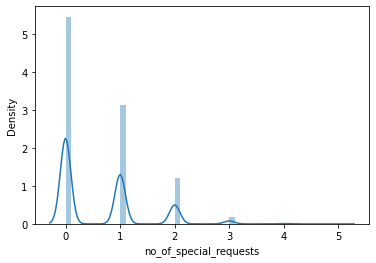

In [61]:
##### Show the distribution of no_of_special_requests #####
print('The distribution of no_of_special_requests is given below.\n')
sns.distplot(df.loc[:, 'no_of_special_requests'])
plt.show()

The countplot of this no_of_special_requests is given below.



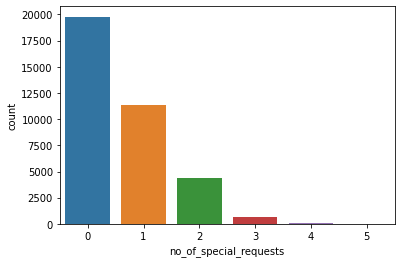

In [62]:
##### Show the countplot of no_of_special_requests #####
print('The countplot of this no_of_special_requests is given below.\n')
sns.countplot(df.loc[:, 'no_of_special_requests'])
plt.show()

The relationshop of no_of_special_requests and average price of room is given below.



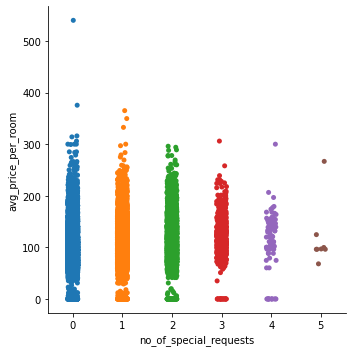

************************************************************************************************************************
The relationshop of no_of_special_requests and average price of room with booking status is given below.



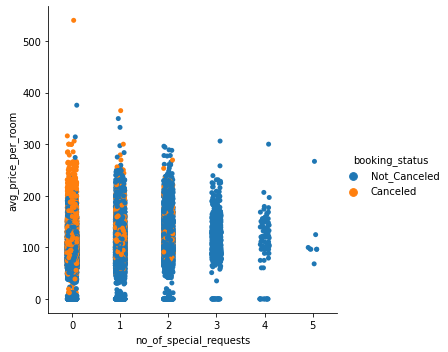

************************************************************************************************************************
It is clearly see that, as the number of request request and the cancelation ratio is decreased.



In [63]:
##### Show the relationship of no_of_special_requests and average price of room #####
print('The relationshop of no_of_special_requests and average price of room is given below.\n')
sns.catplot(x = 'no_of_special_requests', y = 'avg_price_per_room', data = df)
plt.show()
print('*'*120)

##### Show the relationship of no_of_special_requests and average price of room with booking status #####
print('The relationshop of no_of_special_requests and average price of room with booking status is given below.\n')
sns.catplot(x = 'no_of_special_requests', y = 'avg_price_per_room', hue = 'booking_status', data = df)
plt.show()
print('*'*120)

print('It is clearly see that, as the number of request request and the cancelation ratio is decreased.\n')

In [64]:
##### Find out, in which year and month the no_of_special request was high #####
df.groupby(['arrival_year', 'arrival_month'])[['no_of_special_requests']].sum().sort_values(by = 'no_of_special_requests', ascending = False)

no_of_special_requests
arrival_year arrival_month                        
2018         10                               2489
             9                                2234
             8                                2086
             11                               1903
             7                                1852
             12                               1672
             6                                1575
             4                                1414
             5                                1375
             3                                1205
2017         10                                939
             9                                 889
2018         2                                 787
2017         8                                 667
             12                                477
2018         1                                 432
2017         11                                369
             7                                 113

booking_status                 0     1
arrival_year arrival_month            
2018         6              1912  1291
             10             1826  1578
             4              1741   995
             12             1713   380
             3              1658   700
             5              1650   948
2017         10             1611   302
2018         9              1606  1356
             8              1496  1303
             7              1486  1071
             11             1485   848
2017         9              1467   182
2018         2              1274   430
             1               990    24
2017         12              906    22
             8               829   185
             11              620    27
             7               120   243

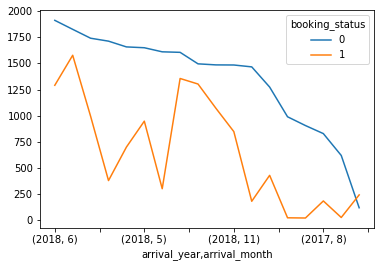

In [65]:
##### Find out, in which year and month the most no_of_special_requests done based on booking status #####
df1.pivot_table(index = ['arrival_year', 'arrival_month'],\
                columns = 'booking_status', values = 'no_of_special_requests',\
                aggfunc = 'count').\
                sort_values([0, 1], ascending = [False, False]).plot()

print('\n\n')
       
df1.pivot_table(index = ['arrival_year', 'arrival_month'],\
                columns = 'booking_status', values = 'no_of_special_requests',\
                aggfunc = 'count').\
                sort_values([0, 1], ascending = [False, False])                                                                                                      

<Figure size 432x576 with 0 Axes>

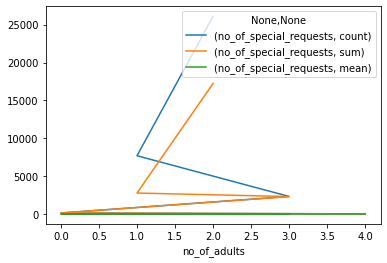

no_of_special_requests                 
                              count    sum      mean
no_of_adults                                        
2                             26108  17248  0.660640
1                              7695   2771  0.360104
3                              2317   2306  0.995252
0                               139    131  0.942446
4                                16     22  1.375000

In [66]:
##### Find out, which type of adults did the no_of_special_requests #####
plt.figure(figsize = (6, 8))
df.groupby(['no_of_adults'])[['no_of_special_requests']].agg(['count', 'sum', 'mean']).\
                                                         sort_values([('no_of_special_requests', 'count'),
                                                                      ('no_of_special_requests',   'sum'),
                                                                      ('no_of_special_requests',  'mean')],\
                                                                       ascending = [False, False, False]).plot()
plt.show()


df.groupby(['no_of_adults'])[['no_of_special_requests']].agg(['count', 'sum', 'mean']).\
                                                         sort_values([('no_of_special_requests', 'count'),
                                                                      ('no_of_special_requests',   'sum'),
                                                                      ('no_of_special_requests',  'mean')],\
                                                                       ascending = [False, False, False])
                                                         

In [67]:
##### Find the describe of this dataset #####
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [68]:
##### Shw the correlation of this dataset #####
df.corr()

no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
required_car_parking_space                0.011429        0.034244   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886        0.337728   
no_of_special_requests                    0.189401        0.124486   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                      0.103316           0.105622   
no_of_children                                    0.029478           0.024398   
no_of_weekend_nights                              1.000000           0.179577   
no_of_week_nights                                 0.179577           1.000000   
required_car_parking_space                       -0.031111          -0.048784   
lead_time                                         0.046595           0.149650   
arrival_year                                      0.055357           0.032672   
arrival_month                                    -0.009894           0.037376   
arrival_date                                      0.027304          -0.009305   
repeated_guest                                   -0.067107          -0.099764   
no_of_previous_cancellations                     -0.020690          -0.030080   
no_of_previous_bookings_not_canceled             -0.026312          -0.049344   
avg_price_per_room                               -0.004525           0.022753   
no_of_special_requests                            0.060593           0.045994   

                                      required_car_parking_space  lead_time  \
no_of_adults                                            0.011429   0.097287   
no_of_children                                          0.034244  -0.047091   
no_of_weekend_nights                                   -0.031111   0.046595   
no_of_week_nights                                      -0.048784   0.149650   
required_car_parking_space                              1.000000  -0.066445   
lead_time                                              -0.066445   1.000000   
arrival_year                                            0.015684   0.143439   
arrival_month                                          -0.015505   0.136814   
arrival_date                                           -0.000037   0.006479   
repeated_guest                                          0.110909  -0.135984   
no_of_previous_cancellations                            0.027106  -0.045723   
no_of_previous_bookings_not_canceled                    0.063810  -0.078137   
avg_price_per_room                                      0.061304  -0.062596   
no_of_special_requests                                  0.087922  -0.101645   

                                      arrival_year  arrival_month  \
no_of_adults                              0.076719       0.021841   
no_of_children                            0.045983      -0.003076   
no_of_weekend_nights                      0.055357      -0.009894   
no_of_week_nights                         0.032672       0.037376   
required_car_parking_space                0.015684      -0.015505   
lead_time                                 0.143439       0.136814   
arrival_year                              1.000000      -0.339689   
arrival_month                    

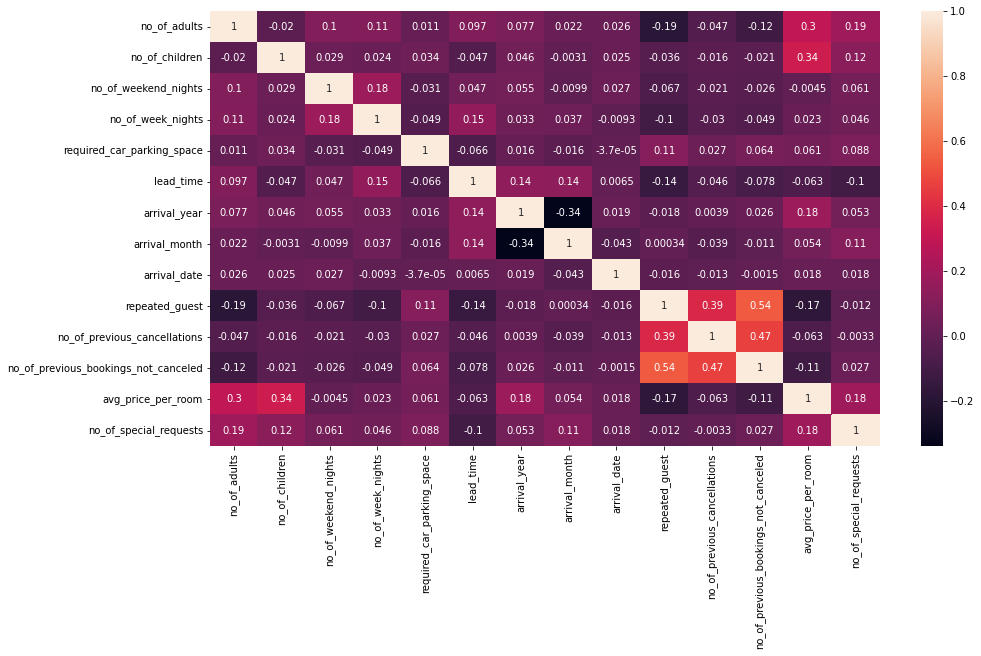

In [69]:
##### Show this correlation in a heatmap #####
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

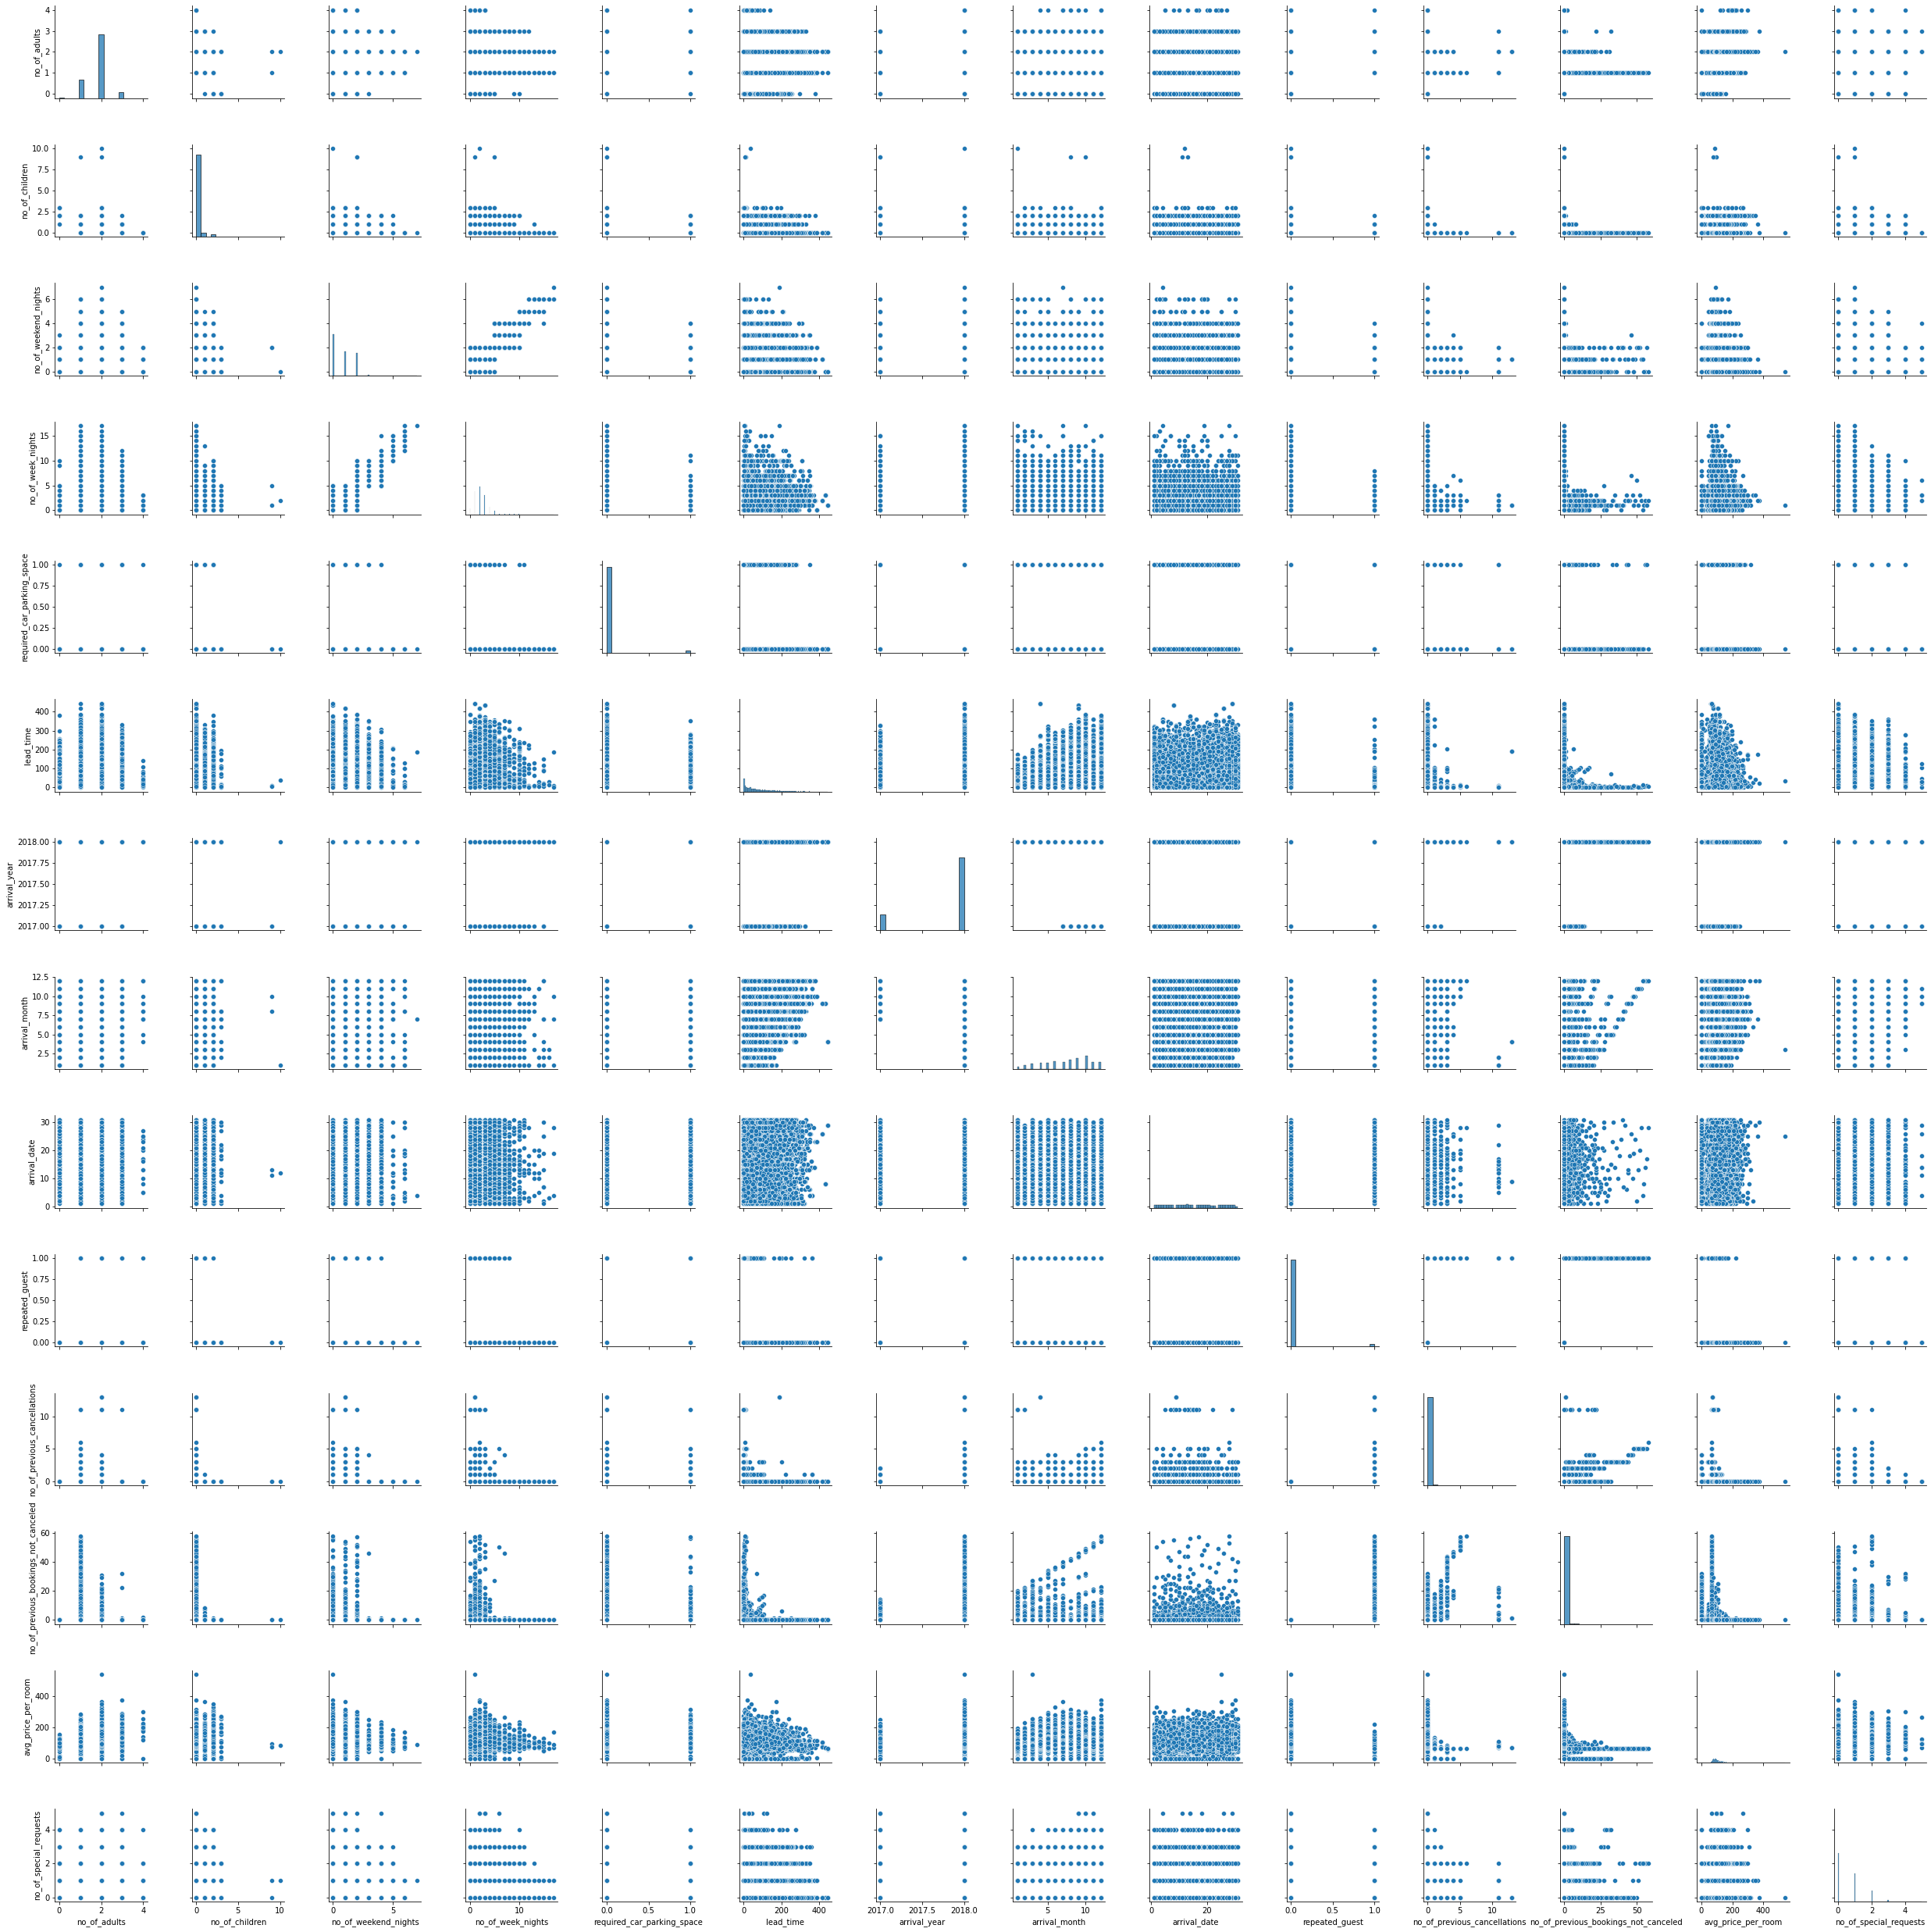

In [70]:
##### Show the pairplot of this entire dataset #####
sns.pairplot(df)
plt.show()

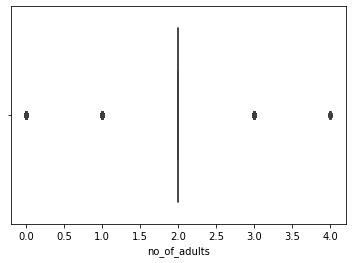

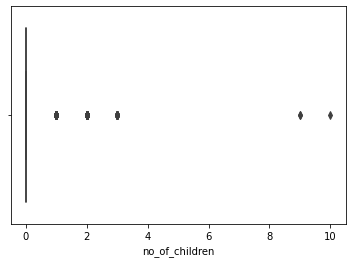

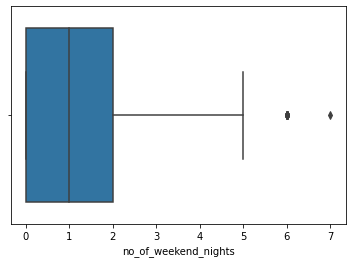

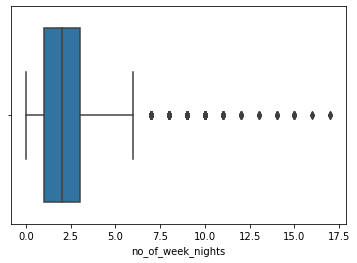

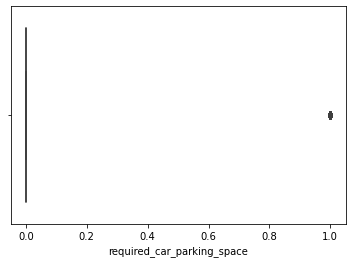

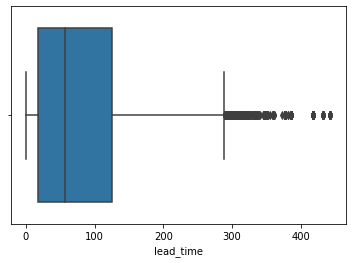

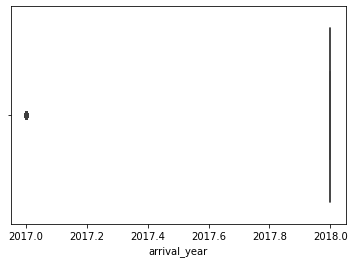

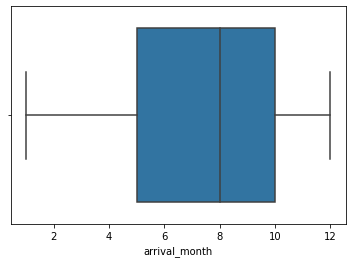

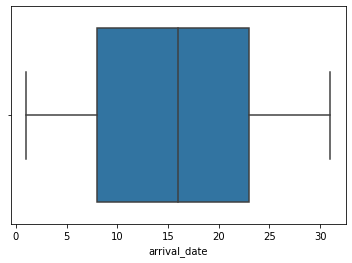

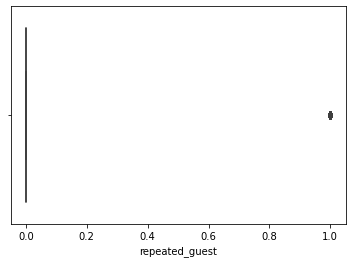

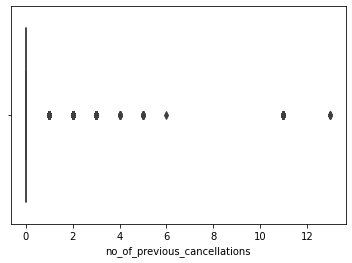

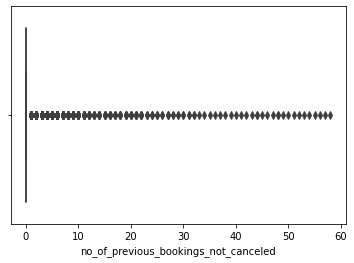

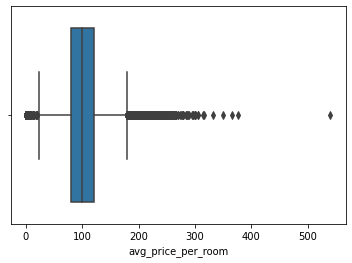

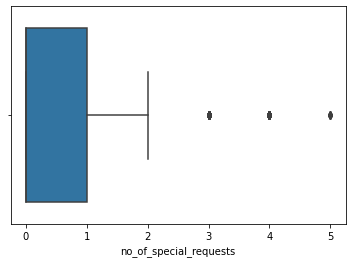

In [71]:
##### Show the outliers #####
for column_ in df.dtypes[df.dtypes != 'object'].index:
  sns.boxplot(column_, data = df)
  plt.show()

Feature Engnieering in this dataset.

In [72]:
##### Show dataset has duplicate records or not #####
if df.duplicated().sum().sum() == 0:
  print('There is no DUPLICATED records in this dataset.')
else:
  print('There is DUPLICATED records in this dataset.')

There is no DUPLICATED records in this dataset.


In [73]:
##### Drop some columns #####
def drop_columns(column_list_):
  df.drop(column_list_, axis = 1, inplace = True)

drop_columns('Booking_ID')

print('Column is deleted.')

Column is deleted.


In [74]:
##### Handle booking_status using Label Encoder : 1 - Not_Canceled #####
df.loc[:, 'booking_status'] = df.loc[:, 'booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})

df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               1  
1                       1               1  
2                       0               0  
3                       0               0  
4                       0               0

In [75]:
##### Do One Hot Encoding type_of_meal_plan, room_type_reserved, market_segment_type ######
one_hot_df = pd.get_dummies(data = df, drop_first = True)

one_hot_df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 28 columns]

In [76]:
##### Show the records of this new dataset #####
print('The old records of that dataset is {}'.format(df.shape[0]),'\n')
print('The old columns of that dataset is {}'.format(df.shape[1]),'\n')
print('*'*120)
print('The new records of this dataset is {}'.format(one_hot_df.shape[0]),'\n')
print('The new columns of this dataset is {}'.format(one_hot_df.shape[1]),'\n')

The old records of that dataset is 36275 

The old columns of that dataset is 18 

************************************************************************************************************************
The new records of this dataset is 36275 

The new columns of this dataset is 28 



In [77]:
##### Print all the columns of this dataset #####
print('The new dataset columns is given below.\n\n\n', one_hot_df.columns)

The new dataset columns is given below.


 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')


In [78]:
##### Drop the target column from this dataset #####
y = one_hot_df.loc[:, 'booking_status']
one_hot_df.drop(['booking_status'], axis = 1, inplace = True)

X = one_hot_df.loc[:, :]

print('The shape of X is {}'.format(X.shape,'\n'))
print('The shape of y is {}'.format(y.shape))

The shape of X is (36275, 27)
The shape of y is (36275,)


In [79]:
##### Preprocessing the dataset #####
StandardScaler_ = StandardScaler()
X_scaled = StandardScaler_.fit_transform(X)

print(X_scaled)

[[ 0.29889263 -0.26147045  0.2174012  ... -0.24264534  1.56383302
  -1.33317382]
 [ 0.29889263 -0.26147045  1.36599262 ... -0.24264534 -0.63945446
   0.75008974]
 [-1.62897546 -0.26147045  1.36599262 ... -0.24264534 -0.63945446
   0.75008974]
 ...
 [ 0.29889263 -0.26147045  1.36599262 ... -0.24264534 -0.63945446
   0.75008974]
 [ 0.29889263 -0.26147045 -0.93119021 ... -0.24264534 -0.63945446
   0.75008974]
 [ 0.29889263 -0.26147045  0.2174012  ... -0.24264534  1.56383302
  -1.33317382]]


In [80]:
##### Split the dataset into train and test #####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, shuffle = True)

print('The X_train shape is {}'.format(X_train.shape),'\n')
print('The X_test  shape is {}'.format(X_test.shape),'\n')
print('The y_train shape is {}'.format(y_train.shape),'\n')
print('The y_test  shape is {}'.format(y_test.shape),'\n')

The X_train shape is (25392, 27) 

The X_test  shape is (10883, 27) 

The y_train shape is (25392,) 

The y_test  shape is (10883,) 



Model Building - Model Performance Evaluate using ML Algorithms.

In [81]:
##### Listed all the models to perform #####
models_list_ = {'GNB': GaussianNB(), 'BNB': BernoulliNB(), 'MNB': MultinomialNB(),\
                'SGD': SGDClassifier(), 'Perception': Perceptron(),\
                'MLP': MLPClassifier(), 'LR': LogisticRegression(),\
                'DT': DecisionTreeClassifier(),'RF': RandomForestClassifier(),\
                'Adaboost': AdaBoostClassifier(), 'GBoost': GradientBoostingClassifier(),\
                'XGB': XGBClassifier()}

##### Run all the models and find the performance by evaluating the metrices #####
performance_list_    = []

for classifier_name, model in models_list_.items():

  dataframe_dictonary_ = {}
  print('{} classifier is running.\n\n'.format(classifier_name).upper())

  ##### Fit the model using that model's object #####
  model.fit(X_train, y_train)

  ##### Predict the model #####
  predicted_ = model.predict(X_test)

  ##### Show the performance using metrics #####
  print('Accuracy score of {} is  = {}'.format(classifier_name, accuracy_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['accuracy_score'.upper()] = accuracy_score(predicted_, y_test)

  print('Precision score of {} is = {}'.format(classifier_name, precision_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['precision_score'.upper()] = precision_score(predicted_, y_test)

  print('Recall score of {} is    = {}'.format(classifier_name, recall_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['recall_score'.upper()] = recall_score(predicted_, y_test)

  print('F1_Score of {} is        = {}'.format(classifier_name, f1_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['f1_score'.upper()] = f1_score(predicted_, y_test)

  print('*'*120)

  ##### Append this into performance list #####
  performance_list_.append(pd.DataFrame(dataframe_dictonary_, index = [classifier_name.upper()]))

GNB CLASSIFIER IS RUNNING.


Accuracy score of gnb is  = 0.41744004410548563 

Precision score of gnb is = 0.1462341946124244 

Recall score of gnb is    = 0.8926174496644296 

F1_score of gnb is        = 0.2512990080302315 

************************************************************************************************************************
BNB CLASSIFIER IS RUNNING.


Accuracy score of bnb is  = 0.722135440595424 

Precision score of bnb is = 0.9018691588785047 

Recall score of bnb is    = 0.7396302975653742 

F1_score of bnb is        = 0.8127322269011642 

************************************************************************************************************************
MNB CLASSIFIER IS RUNNING.


Accuracy score of mnb is  = 0.7271891941560231 

Precision score of mnb is = 0.7853216052776251 

Recall score of mnb is    = 0.8024153910967561 

F1_score of mnb is        = 0.7937764812113635 

***********************************************************************************

In [82]:
##### Show the data frame in Performance #####
pd.concat(performance_list_, axis = 0)

ACCURACY_SCORE  PRECISION_SCORE  RECALL_SCORE  F1_SCORE
GNB               0.417440         0.146234      0.892617  0.251299
BNB               0.722135         0.901869      0.739630  0.812732
MNB               0.727189         0.785322      0.802415  0.793776
SGD               0.761095         0.954371      0.753799  0.842310
PERCEPTION        0.753101         0.935129      0.754407  0.835103
MLP               0.778278         0.967152      0.763978  0.853642
LR                0.799871         0.900220      0.818545  0.857442
DT                0.865386         0.895547      0.902368  0.898945
RF                0.903611         0.946949      0.912220  0.929260
ADABOOST          0.822751         0.892111      0.850164  0.870632
GBOOST            0.851052         0.931556      0.857866  0.893194
XGB               0.849858         0.926883      0.859546  0.891946

Use KFold - 10 to check the performnace

In [83]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
StratifiedKFold_ = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

count_, history_, accuracy_score_, precision_score_, recall_score_, f1_score_ = 1, [], [], [], [], []

for train_index_, test_index_, in StratifiedKFold_.split(X_scaled, y):
  print('Cross validation {} is running.\n'.format(count_).upper())

  X_train, X_test = X_scaled[train_index_], X_scaled[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  RF = RandomForestClassifier()
  RF.fit(X_train, y_train)

  predicted_ = RF.predict(X_test)

  print('Accuracy score is  = {}'.format(accuracy_score(predicted_, y_test)).capitalize(),'\n')
  accuracy_score_.append(accuracy_score(predicted_, y_test))

  print('Precision score is = {}'.format(precision_score(predicted_, y_test)).capitalize(),'\n')
  precision_score_.append(precision_score(predicted_, y_test))

  print('Recall score is    = {}'.format(recall_score(predicted_, y_test)).capitalize(),'\n')
  recall_score_.append(recall_score(predicted_, y_test))

  print('F1_Score is        = {}'.format(f1_score(predicted_, y_test)).capitalize(),'\n')
  f1_score_.append(f1_score(predicted_, y_test))
  
  print('The confusion matrix is given below.\n')
  print(confusion_matrix(predicted_, y_test),'\n')

  count_ = count_ + 1

CROSS VALIDATION 1 IS RUNNING.

Accuracy score is  = 0.9046306504961411 

Precision score is = 0.940959409594096 

Recall score is    = 0.9191029235082099 

F1_score is        = 0.9299027552674229 

The confusion matrix is given below.

[[ 987  144]
 [ 202 2295]] 

CROSS VALIDATION 2 IS RUNNING.

Accuracy score is  = 0.9018743109151047 

Precision score is = 0.9524395243952439 

Recall score is    = 0.9063597346859149 

F1_score is        = 0.928828468612555 

The confusion matrix is given below.

[[ 949  116]
 [ 240 2323]] 

CROSS VALIDATION 3 IS RUNNING.

Accuracy score is  = 0.9076626240352812 

Precision score is = 0.949159491594916 

Recall score is    = 0.9164687252573238 

F1_score is        = 0.932527693856999 

The confusion matrix is given below.

[[ 978  124]
 [ 211 2315]] 

CROSS VALIDATION 4 IS RUNNING.

Accuracy score is  = 0.9167585446527012 

Precision score is = 0.948339483394834 

Recall score is    = 0.9292888710325432 

F1_score is        = 0.9387175324675324 

The 

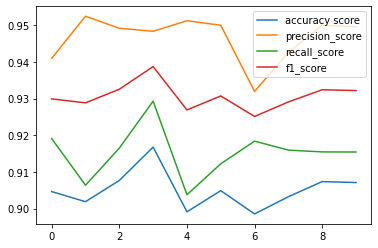

In [84]:
##### Plot the evalution matrix #####
plt.plot(accuracy_score_, label = 'accuracy score')
plt.plot(precision_score_, label = 'precision_score')
plt.plot(recall_score_, label = 'recall_score')
plt.plot(f1_score_, label = 'f1_score')
plt.legend()
plt.show()

In [85]:
##### Show the performance of KFold - 10 #####
print('The list of accuracy score is  {}'.format(accuracy_score_),'\n')
print('The list of precision score is {}'.format(precision_score_),'\n')
print('The list of recall score is    {}'.format(recall_score_),'\n')
print('The list of f1_score score is  {}'.format(f1_score_),'\n')

print('*'*120)

print('The accuracy score is  # {}'.format(np.array(accuracy_score_).mean()),'\n')
print('The precision score is # {}'.format(np.array(precision_score_).mean()),'\n')
print('The recall score is    # {}'.format(np.array(recall_score_).mean()),'\n')
print('The f1_score score is  # {}'.format(np.array(f1_score_).mean()),'\n')

The list of accuracy score is  [0.9046306504961411, 0.9018743109151047, 0.9076626240352812, 0.9167585446527012, 0.8991179713340683, 0.9048800661703887, 0.8985387372484147, 0.9032258064516129, 0.9073614557485525, 0.9070857457954232] 

The list of precision score is [0.940959409594096, 0.9524395243952439, 0.949159491594916, 0.948339483394834, 0.951209512095121, 0.949979499794998, 0.931939319393194, 0.9425994259942599, 0.949979499794998, 0.949569495694957] 

The list of recall score is    [0.9191029235082099, 0.9063597346859149, 0.9164687252573238, 0.9292888710325432, 0.9037787300350604, 0.9122047244094488, 0.9183838383838384, 0.9159362549800797, 0.9154484393520348, 0.9154150197628459] 

The list of f1_score score is  [0.9299027552674229, 0.928828468612555, 0.932527693856999, 0.9387175324675324, 0.926887734718338, 0.9307089777063667, 0.9251119251119252, 0.9290765811275006, 0.9323943661971831, 0.932179512980479] 

****************************************************************************

Use Deep Learning to evaluate the model

In [86]:
##### Create a sequential model #####
model = Sequential()

##### Create first hidden layer with 128 neurons #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X_scaled.shape[1]))
##### Use Dropout layer with 0.3 #####
model.add(Dropout(0.3))

##### Create second hidden layer with 64 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))
##### Use Dropout layer with 0.1 #####
model.add(Dropout(0.1))

##### Create third hidden layer with 32 neurons #####
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_normal'))
##### Use Dropout layer with 0.3, 0.6 #####
model.add(Dropout(0.6))

##### Create an output layer #####
model.add(Dense(units = 1, activation = 'sigmoid'))

##### Compile the model #####
model.compile(optimizer = 'RMSProp', loss = 'binary_crossentropy', metrics = ['accuracy'])

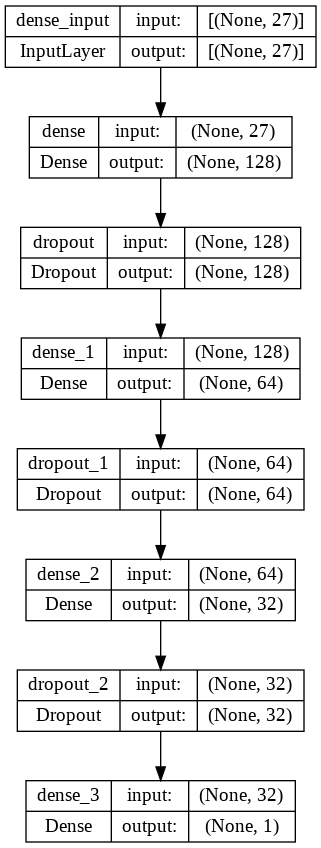

In [87]:
##### Plot this model #####
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [88]:
##### Show the model summary #####
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3584      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [89]:
##### fit the model and run it #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 256, epochs = 500, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/500
128/128 [==============================] - 2s 6ms/step - loss: 0.5733 - accuracy: 0.7168 - val_loss: 0.4272 - val_accuracy: 0.8120
Epoch 2/500
128/128 [==============================] - 1s 4ms/step - loss: 0.4738 - accuracy: 0.7789 - val_loss: 0.4109 - val_accuracy: 0.8158
Epoch 3/500
128/128 [==============================] - 1s 5ms/step - loss: 0.4510 - accuracy: 0.7935 - val_loss: 0.3916 - val_accuracy: 0.8186
Epoch 4/500
128/128 [==============================] - 1s 5ms/step - loss: 0.4382 - accuracy: 0.7998 - val_loss: 0.3854 - val_accuracy: 0.8227
Epoch 5/500
128/128 [==============================] - 1s 5ms/step - loss: 0.4241 - accuracy: 0.8072 - val_loss: 0.3800 - val_accuracy: 0.8274
Epoch 6/500
128/128 [==============================] - 1s 4ms/step - loss: 0.4199 - accuracy: 0.8108 - val_loss: 0.3712 - val_accuracy: 0.8269
Epoch 7/500
128/128 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.8143 - val_loss: 0.3659 - val_accuracy: 0.8293

In [90]:
##### Evaluate the model #####
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)

print('accuracy is  = {}'.format(accuracy_score(predicted_, y_test)),'\n')
print('precision is = {}'.format(precision_score(predicted_, y_test)),'\n')
print('recall is    = {}'.format(recall_score(predicted_, y_test)),'\n')
print('F1_Score is  = {}'.format(f1_score(predicted_, y_test)),'\n')

114/114 [==============================] - 0s 1ms/step
accuracy is  = 0.8786876206231045 

precision is = 0.932349323493235 

recall is    = 0.892114554727344 

F1_Score is  = 0.9117882919005613 



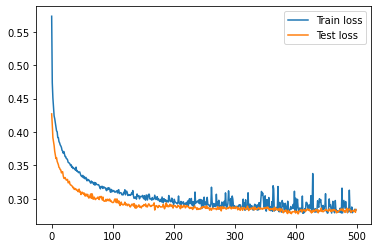

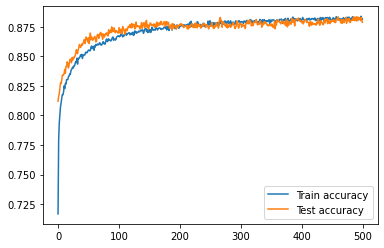

In [91]:
##### Plot the history #####
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()


plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

Use KFold - 10 in this Deep Learning Architecture

In [92]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
StratifiedKFold_ = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

count_, history_list_, accuracy_score_, precision_score_, recall_score_, f1_score_ = 1, [], [], [], [], []

for train_index_, test_index_, in StratifiedKFold_.split(X_scaled, y):
  print('Cross validation {} is running.\n'.format(count_).upper())

  X_train, X_test = X_scaled[train_index_], X_scaled[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  history_ = model.fit(x = X_train, y = y_train, batch_size = 256, epochs = 200, validation_data = (X_test, y_test), verbose = 1)

  predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)

  print('Accuracy score is  = {}'.format(accuracy_score(predicted_, y_test)).capitalize(),'\n')
  accuracy_score_.append(accuracy_score(predicted_, y_test))

  print('Precision score is = {}'.format(precision_score(predicted_, y_test)).capitalize(),'\n')
  precision_score_.append(precision_score(predicted_, y_test))

  print('Recall score is    = {}'.format(recall_score(predicted_, y_test)).capitalize(),'\n')
  recall_score_.append(recall_score(predicted_, y_test))

  print('F1_Score is        = {}'.format(f1_score(predicted_, y_test)).capitalize(),'\n')
  f1_score_.append(f1_score(predicted_, y_test))
  
  print('The confusion matrix is given below.\n')
  print(confusion_matrix(predicted_, y_test),'\n')

  history_list_.append(history_)

  count_ = count_ + 1

CROSS VALIDATION 1 IS RUNNING.

Epoch 1/200
128/128 [==============================] - 1s 5ms/step - loss: 0.2899 - accuracy: 0.8777 - val_loss: 0.2343 - val_accuracy: 0.9082
Epoch 2/200
128/128 [==============================] - 1s 4ms/step - loss: 0.2868 - accuracy: 0.8799 - val_loss: 0.2393 - val_accuracy: 0.9046
Epoch 3/200
128/128 [==============================] - 1s 4ms/step - loss: 0.2851 - accuracy: 0.8816 - val_loss: 0.2414 - val_accuracy: 0.9030
Epoch 4/200
128/128 [==============================] - 1s 4ms/step - loss: 0.2903 - accuracy: 0.8810 - val_loss: 0.2371 - val_accuracy: 0.9030
Epoch 5/200
128/128 [==============================] - 1s 5ms/step - loss: 0.3025 - accuracy: 0.8795 - val_loss: 0.2399 - val_accuracy: 0.8991
Epoch 6/200
128/128 [==============================] - 1s 5ms/step - loss: 0.2905 - accuracy: 0.8783 - val_loss: 0.2422 - val_accuracy: 0.9008
Epoch 7/200
128/128 [==============================] - 1s 4ms/step - loss: 0.2838 - accuracy: 0.8803 - val_los

For Cross Validation 1::: 



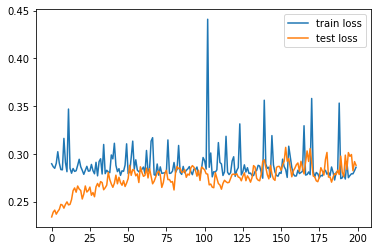

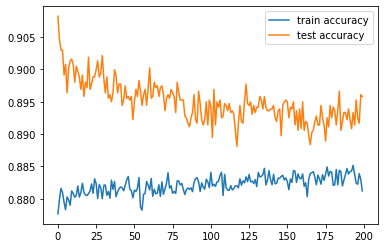

For Cross Validation 2::: 



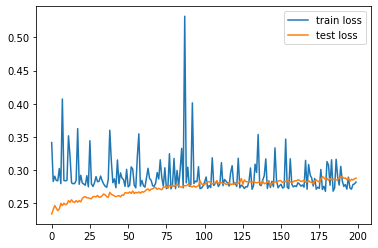

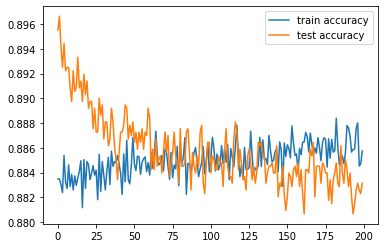

For Cross Validation 3::: 



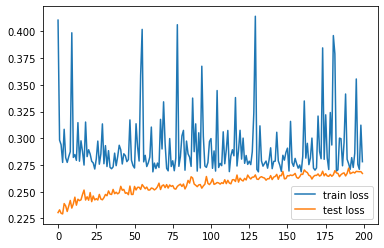

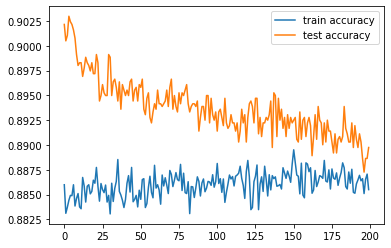

For Cross Validation 4::: 



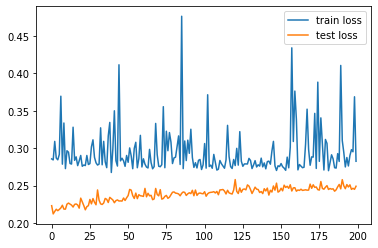

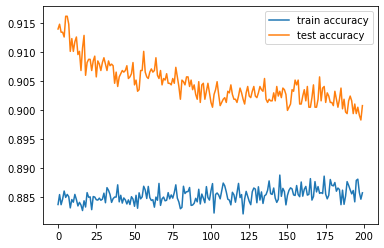

For Cross Validation 5::: 



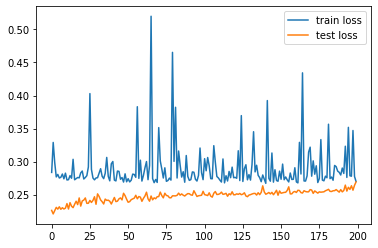

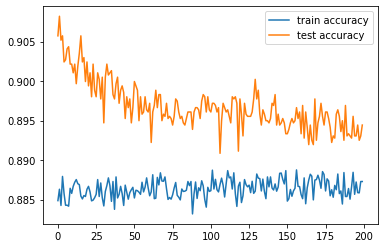

For Cross Validation 6::: 



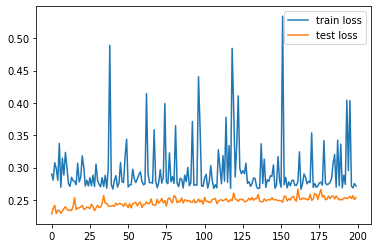

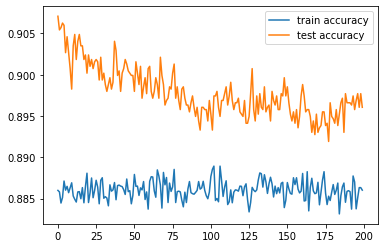

For Cross Validation 7::: 



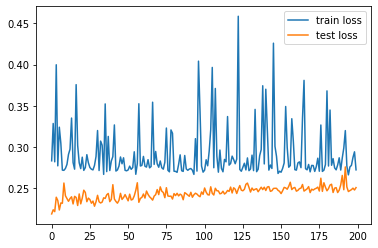

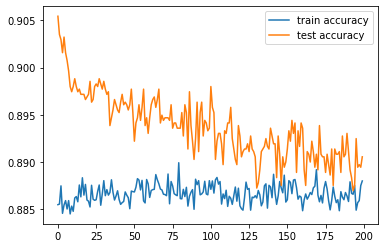

For Cross Validation 8::: 



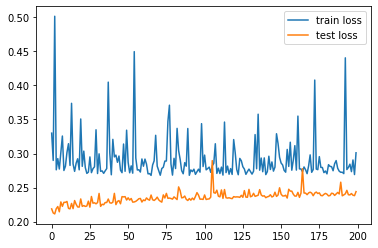

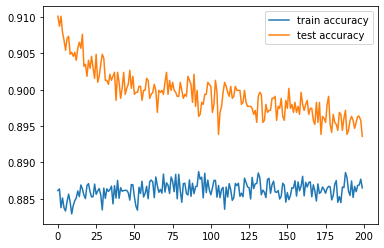

For Cross Validation 9::: 



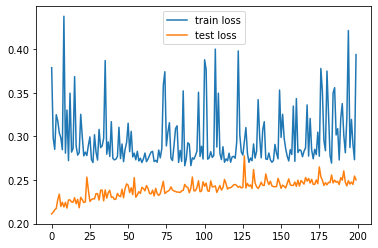

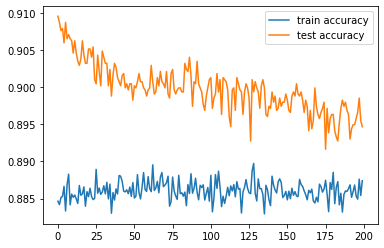

For Cross Validation 10::: 



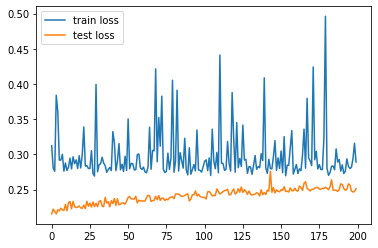

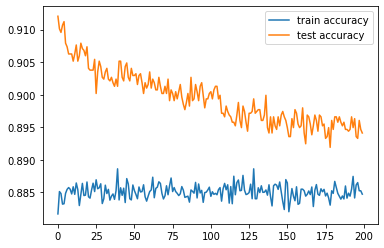

In [93]:
##### Plot the history #####
for index_, hist_ in enumerate(history_list_):
  print('For Cross Validation {}::: \n'.format(index_ + 1))
  plt.plot(hist_.history['loss'], label = 'train loss')
  plt.plot(hist_.history['val_loss'], label = 'test loss')
  plt.legend()
  plt.show()

  print('\n\n')

  plt.plot(hist_.history['accuracy'], label = 'train accuracy')
  plt.plot(hist_.history['val_accuracy'], label = 'test accuracy')
  plt.legend()
  plt.show()

In [94]:
##### Show the performance of KFold - 10 #####
print('The list of accuracy score is  {}'.format(accuracy_score_),'\n')
print('The list of precision score is {}'.format(precision_score_),'\n')
print('The list of recall score is    {}'.format(recall_score_),'\n')
print('The list of f1_score score is  {}'.format(f1_score_),'\n')

print('*'*120)

print('The accuracy score is  # {}'.format(np.array(accuracy_score_).mean()),'\n')
print('The precision score is # {}'.format(np.array(precision_score_).mean()),'\n')
print('The recall score is    # {}'.format(np.array(recall_score_).mean()),'\n')
print('The f1_score score is  # {}'.format(np.array(f1_score_).mean()),'\n')

The list of accuracy score is  [0.8958103638368247, 0.8831312017640573, 0.8897464167585446, 0.9007717750826902, 0.8944321940463065, 0.8960573476702509, 0.8905431486076647, 0.8935759580920871, 0.8946787979046044, 0.8941273779983457] 

The list of precision score is [0.9462894628946289, 0.9454694546945469, 0.940959409594096, 0.9438294382943829, 0.948749487494875, 0.9516195161951619, 0.9261992619926199, 0.9348093480934809, 0.9466994669946699, 0.949569495694957] 

The list of recall score is    [0.9033268101761253, 0.8879476318829419, 0.8996471971775775, 0.9116831683168317, 0.8996889580093312, 0.8996124031007752, 0.9123586429725363, 0.9094535301156761, 0.9016009371339321, 0.8987194412107101] 

The list of f1_score score is  [0.9243091710052062, 0.9158061953931692, 0.9198396793587174, 0.9274778404512489, 0.9235681500698463, 0.9248854353456865, 0.9192268565615462, 0.921957137080469, 0.9236, 0.9234449760765552] 

********************************************************************************

Feature Selection Technique and Handle Imbalanced Dataset used to train the model in ML & Deep Learning

In [95]:
##### Show the dataset #####
df = pd.read_csv('/content/Hotel Reservations.csv')

df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [96]:
##### Label Encoding in booking_status #####
df.loc[:, 'booking_status'] = df.loc[:, 'booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})

df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               1  
1                       1               1  
2                       0               0  
3                       0               0  
4                       0               0

In [97]:
##### Handle the categorical data - Using Target based Ordinal Encoding #####
def target_based_ornial_encoding(feature_):
  df.loc[:, feature_] =  df.loc[:, feature_].\
        map({key_: value_ for value_, \
             key_ in enumerate(df.groupby([feature_])['booking_status'].mean().\
                    sort_values(ascending = True).index)})
        
for column_ in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']:
  target_based_ornial_encoding(column_)
  print('{} encoding is done.\n'.format(column_))

df.head()

type_of_meal_plan encoding is done.

room_type_reserved encoding is done.

market_segment_type encoding is done.



Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  2                  2                           0   
1                  3                  1                           0   
2                  1                  2                           0   
3                  2                  2                           0   
4                  1                  1                           0   

   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                   3        224          2017             10             2   
1                   3          5          2018             11             6   
2                   3          1          2018              2            28   
3                   3        211          2018              5            20   
4                   3         48          2018              4            11   

   market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                    1               0                             0   
1                    0               0                             0   
2                    0               0                             0   
3                    0               0                             0   
4                    0               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               1  
1                       1               1  
2                       0               0  
3                       0               0  
4                       0               0

In [98]:
##### split the dataset into X and y #####
y = df.loc[:, 'booking_status']
df.drop(['booking_status'], axis = 1, inplace = True)
df.drop(['Booking_ID'], axis = 1, inplace = True)
X = df.loc[:, :]

print('The shape of X is {}'.format(X.shape),'\n')
print('The shape of y is {}'.format(y.shape),'\n')

The shape of X is (36275, 17) 

The shape of y is (36275,) 



In [99]:
##### Split the dataset into train and test #####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, shuffle = True)

print('The X_train shape is {}'.format(X_train.shape),'\n')
print('The X_test  shape is {}'.format(X_test.shape),'\n')
print('The y_train shape is {}'.format(y_train.shape),'\n')
print('The y_test  shape is {}'.format(y_test.shape),'\n')

The X_train shape is (25392, 17) 

The X_test  shape is (10883, 17) 

The y_train shape is (25392,) 

The y_test  shape is (10883,) 



In [100]:
##### Feature Selection Technique - Random Forest #####
RF_feature_selection = RandomForestClassifier()
RF_feature_selection.fit(X_train, y_train)

print('The feature imporatnce list is {}'.format(RF_feature_selection.feature_importances_))

The feature imporatnce list is [2.43504926e-02 7.25804820e-03 3.66301211e-02 5.11846152e-02
 2.14728043e-02 6.31691445e-03 1.62585407e-02 3.18202527e-01
 2.56495494e-02 7.90476609e-02 9.11914025e-02 5.33332720e-02
 2.04120426e-03 2.91828450e-04 1.91617834e-03 1.65920098e-01
 9.89347434e-02]


In [101]:
##### Find the Feature Imporatnce #####
pd.concat([pd.DataFrame(X.columns, columns = ['Feature']), \
           pd.DataFrame(RF_feature_selection.feature_importances_, columns = ['Importance'])], axis = 1).\
           set_index('Feature')

Importance
Feature                                         
no_of_adults                            0.024350
no_of_children                          0.007258
no_of_weekend_nights                    0.036630
no_of_week_nights                       0.051185
type_of_meal_plan                       0.021473
required_car_parking_space              0.006317
room_type_reserved                      0.016259
lead_time                               0.318203
arrival_year                            0.025650
arrival_month                           0.079048
arrival_date                            0.091191
market_segment_type                     0.053333
repeated_guest                          0.002041
no_of_previous_cancellations            0.000292
no_of_previous_bookings_not_canceled    0.001916
avg_price_per_room                      0.165920
no_of_special_requests                  0.098935

In [102]:
##### Take top 7 features ######
pd.concat([pd.DataFrame(X.columns, columns = ['Feature']), \
           pd.DataFrame(RF_feature_selection.feature_importances_, columns = ['Importance'])], axis = 1).\
           set_index('Feature').sort_values(by = 'Importance', ascending = False).head(7)

Importance
Feature                           
lead_time                 0.318203
avg_price_per_room        0.165920
no_of_special_requests    0.098935
arrival_date              0.091191
arrival_month             0.079048
market_segment_type       0.053333
no_of_week_nights         0.051185

In [103]:
##### Create the new dataframe #####
print('Top 7 features using RF is \n\n\n{}'.format(pd.concat([pd.DataFrame(X.columns, columns = ['Feature']), \
           pd.DataFrame(RF_feature_selection.feature_importances_, columns = ['Importance'])], axis = 1).\
           set_index('Feature').sort_values(by = 'Importance', ascending = False).head(7).index))

print('\n\n')

top_7 = list(pd.concat([pd.DataFrame(X.columns, columns = ['Feature']), \
           pd.DataFrame(RF_feature_selection.feature_importances_, columns = ['Importance'])], axis = 1).\
           set_index('Feature').sort_values(by = 'Importance', ascending = False).head(7).index)

top7_df = df[top_7]

top7_df.head()

Top 7 features using RF is 


Index(['lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'arrival_date', 'arrival_month', 'market_segment_type',
       'no_of_week_nights'],
      dtype='object', name='Feature')





lead_time  avg_price_per_room  no_of_special_requests  arrival_date  \
0        224               65.00                       0             2   
1          5              106.68                       1             6   
2          1               60.00                       0            28   
3        211              100.00                       0            20   
4         48               94.50                       0            11   

   arrival_month  market_segment_type  no_of_week_nights  
0             10                    1                  2  
1             11                    0                  3  
2              2                    0                  1  
3              5                    0                  2  
4              4                    0                  1

In [104]:
##### Concat the larget column with this top7_df #####
StandardScaler_ = StandardScaler()
top7_scaled_df = StandardScaler_.fit_transform(top7_df)

print('The preprocessing dataset is \n\n {}'.format(top7_scaled_df),'\n')

top7_scaled_df = pd.DataFrame(top7_scaled_df, columns = top7_df.columns)

top7_scaled_df = pd.concat([top7_scaled_df, y], axis = 1)

top7_scaled_df.head()

The preprocessing dataset is 

 [[ 1.61489628 -1.09503276 -0.78813999 ...  0.83924152  0.58103332
  -0.14480303]
 [-0.93370069  0.09280591  0.48376045 ...  1.16499011 -0.59763706
   0.56397175]
 [-0.98025041 -1.2375278  -0.78813999 ... -1.76674722 -0.59763706
  -0.85357781]
 ...
 [ 0.73045167 -0.14345087  1.75566089 ... -0.13800426 -0.59763706
   2.69029611]
 [-0.2587298  -0.25431201 -0.78813999 ... -1.11525003 -0.59763706
   0.56397175]
 [ 1.41705998  1.65996637 -0.78813999 ...  1.49073871  0.58103332
  -0.14480303]] 



lead_time  avg_price_per_room  no_of_special_requests  arrival_date  \
0   1.614896           -1.095033                -0.78814     -1.555662   
1  -0.933701            0.092806                 0.48376     -1.098013   
2  -0.980250           -1.237528                -0.78814      1.419055   
3   1.463610           -0.097567                -0.78814      0.503757   
4  -0.433291           -0.254312                -0.78814     -0.525952   

   arrival_month  market_segment_type  no_of_week_nights  booking_status  
0       0.839242             0.581033          -0.144803               1  
1       1.164990            -0.597637           0.563972               1  
2      -1.766747            -0.597637          -0.853578               0  
3      -0.789501            -0.597637          -0.144803               0  
4      -1.115250            -0.597637          -0.853578               0

The countplot of booking status is given below.




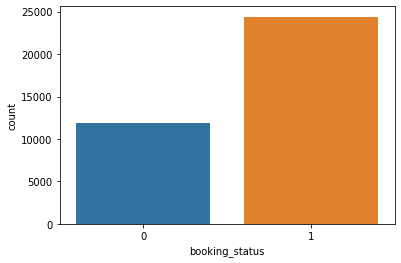

In [105]:
##### Show the countplot of this new dataset #####
print('The countplot of booking status is given below.\n\n')
sns.countplot(top7_scaled_df.loc[:, 'booking_status'])
plt.show()

Balanced the datasett using Imblearn Liabries

In [106]:
##### Split the dataset into X and y ####
y = top7_scaled_df.loc[:, 'booking_status']
top7_scaled_df.drop(['booking_status'], axis = 1, inplace = True)
X = top7_scaled_df.loc[:, :]

##### Use ADASYN technique to handle the imbalanced the dataset #####
KMeansSMOTE_ = KMeansSMOTE()
X_balanced, y_balanced = KMeansSMOTE_.fit_resample(X, y)

print('The shape of X_balanced is {}'.format(X_balanced.shape))
print('The shape of y_balanced is {}'.format(y_balanced.shape))

The shape of X_balanced is (48780, 7)
The shape of y_balanced is (48780,)


The countplot of this booking status is.




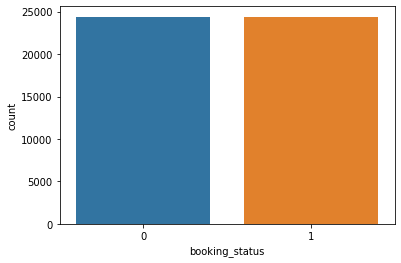

In [107]:
##### Show the countplot of booking_status #####
print('The countplot of this booking status is.\n\n')
sns.countplot(y_balanced)
plt.show()

In [108]:
##### Split the dataset into train and test #####
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.30, random_state = 42, shuffle = True)

print('The X_train shape is {}'.format(X_train.shape),'\n')
print('The X_test  shape is {}'.format(X_test.shape),'\n')
print('The y_train shape is {}'.format(y_train.shape),'\n')
print('The y_test  shape is {}'.format(y_test.shape),'\n')

The X_train shape is (34146, 7) 

The X_test  shape is (14634, 7) 

The y_train shape is (34146,) 

The y_test  shape is (14634,) 



Use ML algorithms and evaluate the performance.

In [109]:
##### Listed all the models to perform #####
models_list_ = {'GNB': GaussianNB(), 'BNB': BernoulliNB(),\
                'SGD': SGDClassifier(), 'Perception': Perceptron(),\
                'MLP': MLPClassifier(), 'LR': LogisticRegression(),\
                'DT': DecisionTreeClassifier(),'RF': RandomForestClassifier(),\
                'Adaboost': AdaBoostClassifier(), 'GBoost': GradientBoostingClassifier(),\
                'XGB': XGBClassifier()}

##### Run all the models and find the performance by evaluating the metrices #####
performance_list_    = []

for classifier_name, model in models_list_.items():

  dataframe_dictonary_ = {}
  print('{} classifier is running.\n\n'.format(classifier_name).upper())

  ##### Fit the model using that model's object #####
  model.fit(X_train, y_train)

  ##### Predict the model #####
  predicted_ = model.predict(X_test)

  ##### Show the performance using metrics #####
  print('Accuracy score of {} is  = {}'.format(classifier_name, accuracy_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['accuracy_score'.upper()] = accuracy_score(predicted_, y_test)

  print('Precision score of {} is = {}'.format(classifier_name, precision_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['precision_score'.upper()] = precision_score(predicted_, y_test)

  print('Recall score of {} is    = {}'.format(classifier_name, recall_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['recall_score'.upper()] = recall_score(predicted_, y_test)

  print('F1_Score of {} is        = {}'.format(classifier_name, f1_score(predicted_, y_test)).capitalize(),'\n')
  dataframe_dictonary_['f1_score'.upper()] = f1_score(predicted_, y_test)

  print('\n\n')
  
  print('The confusion matrix is given below.\n')
  print(confusion_matrix(predicted_, y_test))

  print('*'*120)

  ##### Append this into performance list #####
  performance_list_.append(pd.DataFrame(dataframe_dictonary_, index = [classifier_name.upper()]))

GNB CLASSIFIER IS RUNNING.


Accuracy score of gnb is  = 0.8174115074484078 

Precision score of gnb is = 0.8367989056087551 

Recall score of gnb is    = 0.8052922590837283 

F1_score of gnb is        = 0.8207433248356366 




The confusion matrix is given below.

[[5845 1193]
 [1479 6117]]
************************************************************************************************************************
BNB CLASSIFIER IS RUNNING.


Accuracy score of bnb is  = 0.7852945196118628 

Precision score of bnb is = 0.7515731874145006 

Recall score of bnb is    = 0.8055718475073314 

F1_score of bnb is        = 0.7776362349610757 




The confusion matrix is given below.

[[5998 1816]
 [1326 5494]]
************************************************************************************************************************
SGD CLASSIFIER IS RUNNING.


Accuracy score of sgd is  = 0.8405767391007244 

Precision score of sgd is = 0.8745554035567715 

Recall score of sgd is    = 0.818670764502497

In [110]:
pd.concat(performance_list_)

ACCURACY_SCORE  PRECISION_SCORE  RECALL_SCORE  F1_SCORE
GNB               0.817412         0.836799      0.805292  0.820743
BNB               0.785295         0.751573      0.805572  0.777636
SGD               0.840577         0.874555      0.818671  0.845691
PERCEPTION        0.806683         0.729549      0.862247  0.790367
MLP               0.876930         0.869494      0.882410  0.875904
LR                0.837502         0.859371      0.823113  0.840851
DT                0.893672         0.892339      0.894542  0.893439
RF                0.922783         0.940629      0.908082  0.924069
ADABOOST          0.859710         0.875103      0.848746  0.861723
GBOOST            0.871874         0.885089      0.862092  0.873439
XGB               0.866680         0.876881      0.859134  0.867917

In [111]:
##### Use StackingClassifier #####
estimators_ = [
    ('RF', RandomForestClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier())
]

StackingClassifier_ = StackingClassifier(estimators = estimators_, final_estimator = RandomForestClassifier(), cv = 10, n_jobs = -1)
StackingClassifier_.fit(X_train, y_train)

predicted_= StackingClassifier_.predict(X_test)

print('accuracy is  = {}'.format(accuracy_score(predicted_, y_test)),'\n')
print('precision is = {}'.format(precision_score(predicted_, y_test)),'\n')
print('recall is    = {}'.format(recall_score(predicted_, y_test)),'\n')
print('F1_Score is  = {}'.format(f1_score(predicted_, y_test)),'\n')

accuracy is  = 0.9160174935082684 

precision is = 0.934610123119015 

recall is    = 0.9009626796782276 

F1_Score is  = 0.9174780098032632 



Use KFold - 10 to evaluate the model

In [112]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
StratifiedKFold_ = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

count_, history_, accuracy_score_, precision_score_, recall_score_, f1_score_ = 1, [], [], [], [], []

for train_index_, test_index_, in StratifiedKFold_.split(X_scaled, y):
  print('Cross validation {} is running.\n'.format(count_).upper())

  X_train, X_test = X_scaled[train_index_], X_scaled[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  StackingClassifier_.fit(X_train, y_train)

  predicted_ = RF.predict(X_test)

  print('Accuracy score is  = {}'.format(accuracy_score(predicted_, y_test)).capitalize(),'\n')
  accuracy_score_.append(accuracy_score(predicted_, y_test))

  print('Precision score is = {}'.format(precision_score(predicted_, y_test)).capitalize(),'\n')
  precision_score_.append(precision_score(predicted_, y_test))

  print('Recall score is    = {}'.format(recall_score(predicted_, y_test)).capitalize(),'\n')
  recall_score_.append(recall_score(predicted_, y_test))

  print('F1_Score is        = {}'.format(f1_score(predicted_, y_test)).capitalize(),'\n')
  f1_score_.append(f1_score(predicted_, y_test))
  
  print('The confusion matrix is given below.\n')
  print(confusion_matrix(predicted_, y_test),'\n')

  count_ = count_ + 1

CROSS VALIDATION 1 IS RUNNING.

Accuracy score is  = 0.9944873208379272 

Precision score is = 0.997539975399754 

Recall score is    = 0.9942787086228034 

F1_score is        = 0.9959066721244372 

The confusion matrix is given below.

[[1175    6]
 [  14 2433]] 

CROSS VALIDATION 2 IS RUNNING.

Accuracy score is  = 0.9950385887541345 

Precision score is = 0.997949979499795 

Recall score is    = 0.9946873722926032 

F1_score is        = 0.9963160049119936 

The confusion matrix is given below.

[[1176    5]
 [  13 2434]] 

CROSS VALIDATION 3 IS RUNNING.

Accuracy score is  = 0.993109151047409 

Precision score is = 0.996719967199672 

Recall score is    = 0.9930555555555556 

F1_score is        = 0.9948843871495806 

The confusion matrix is given below.

[[1172    8]
 [  17 2431]] 

CROSS VALIDATION 4 IS RUNNING.

Accuracy score is  = 0.9958654906284454 

Precision score is = 0.996719967199672 

Recall score is    = 0.9971287940935193 

F1_score is        = 0.9969243387328275 

The 

In [113]:
##### Show the performance of KFold - 10 #####
print('The list of accuracy score is  {}'.format(accuracy_score_),'\n')
print('The list of precision score is {}'.format(precision_score_),'\n')
print('The list of recall score is    {}'.format(recall_score_),'\n')
print('The list of f1_score score is  {}'.format(f1_score_),'\n')

print('*'*120)

print('The accuracy score is  # {}'.format(np.array(accuracy_score_).mean()),'\n')
print('The precision score is # {}'.format(np.array(precision_score_).mean()),'\n')
print('The recall score is    # {}'.format(np.array(recall_score_).mean()),'\n')
print('The f1_score score is  # {}'.format(np.array(f1_score_).mean()),'\n')

The list of accuracy score is  [0.9944873208379272, 0.9950385887541345, 0.993109151047409, 0.9958654906284454, 0.9917309812568909, 0.9922801213123794, 0.9914529914529915, 0.9950372208436724, 0.9961400606561897, 0.9070857457954232] 

The list of precision score is [0.997539975399754, 0.997949979499795, 0.996719967199672, 0.996719967199672, 0.996719967199672, 0.996719967199672, 0.993029930299303, 0.998769987699877, 0.997949979499795, 0.949569495694957] 

The list of recall score is    [0.9942787086228034, 0.9946873722926032, 0.9930555555555556, 0.9971287940935193, 0.9910313901345291, 0.9918400652794778, 0.9942528735632183, 0.9938800489596084, 0.9963160049119935, 0.9154150197628459] 

The list of f1_score score is  [0.9959066721244372, 0.9963160049119936, 0.9948843871495806, 0.9969243387328275, 0.9938675388389208, 0.9942740286298569, 0.9936410256410256, 0.996319018404908, 0.9971323228185169, 0.932179512980479] 

*****************************************************************************

In [114]:
print('It is surprised to see that, after doing the Imbalanced to balanced technique, the accuracy and other metrices for evaluting the performance is increased. wow !!')

It is surprised to see that, after doing the Imbalanced to balanced technique, the accuracy and other metrices for evaluting the performance is increased. wow !!


Deep Learning Technique Used to evaluate the model

In [115]:
##### Split the dataset into train and test #####
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.30, random_state = 42, shuffle = True)

print('The X_train shape is {}'.format(X_train.shape),'\n')
print('The X_test  shape is {}'.format(X_test.shape),'\n')
print('The y_train shape is {}'.format(y_train.shape),'\n')
print('The y_test  shape is {}'.format(y_test.shape),'\n')

The X_train shape is (34146, 7) 

The X_test  shape is (14634, 7) 

The y_train shape is (34146,) 

The y_test  shape is (14634,) 



In [116]:
##### Create a sequential model #####
model = Sequential()

##### Create first hidden layer with 128 neurons #####
model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X_balanced.shape[1]))
##### Use Dropout layer with 0.3 #####
model.add(Dropout(0.5))

##### Create second hidden layer with 64 neurons #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))
##### Use Dropout layer with 0.1 #####
# model.add(Dropout(0.5))

##### Create third hidden layer with 32 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))
##### Use Dropout layer with 0.6 #####
# model.add(Dropout(0.6))

##### Create an output layer #####
model.add(Dense(units = 1, activation = 'sigmoid'))

##### Compile the model #####
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [117]:
X_balanced.shape

(48780, 7)

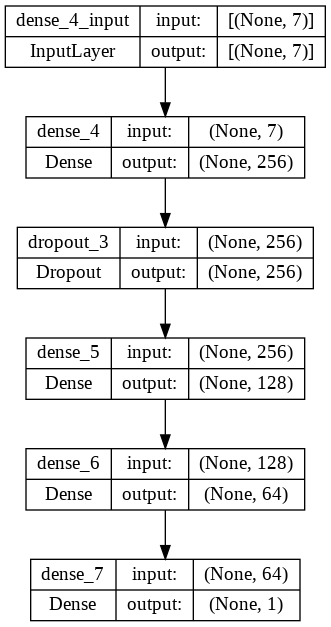

In [118]:
##### Plot this model #####
plot_model(model, to_file='model_plot_balanced.png', show_shapes=True, show_layer_names=True)

In [119]:
##### Show the model summary #####
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2048      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,265
Trainable params: 43,265
Non-trainable params: 0
_________________________________________________________________


In [120]:
##### fit the model and run it #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
534/534 [==============================] - 3s 5ms/step - loss: 0.3853 - accuracy: 0.8329 - val_loss: 0.3415 - val_accuracy: 0.8468
Epoch 2/100
534/534 [==============================] - 2s 4ms/step - loss: 0.3529 - accuracy: 0.8488 - val_loss: 0.3366 - val_accuracy: 0.8568
Epoch 3/100
534/534 [==============================] - 2s 4ms/step - loss: 0.3421 - accuracy: 0.8523 - val_loss: 0.3227 - val_accuracy: 0.8577
Epoch 4/100
534/534 [==============================] - 2s 4ms/step - loss: 0.3327 - accuracy: 0.8567 - val_loss: 0.3190 - val_accuracy: 0.8616
Epoch 5/100
534/534 [==============================] - 2s 4ms/step - loss: 0.3253 - accuracy: 0.8583 - val_loss: 0.3125 - val_accuracy: 0.8683
Epoch 6/100
534/534 [==============================] - 2s 4ms/step - loss: 0.3200 - accuracy: 0.8609 - val_loss: 0.3026 - val_accuracy: 0.8652
Epoch 7/100
534/534 [==============================] - 2s 4ms/step - loss: 0.3157 - accuracy: 0.8646 - val_loss: 0.3031 - val_accuracy: 0.8697

In [121]:
##### Evaluate the model #####
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)

print('accuracy is  = {}'.format(accuracy_score(predicted_, y_test)),'\n')
print('precision is = {}'.format(precision_score(predicted_, y_test)),'\n')
print('recall is    = {}'.format(recall_score(predicted_, y_test)),'\n')
print('F1_Score is  = {}'.format(f1_score(predicted_, y_test)),'\n')

458/458 [==============================] - 1s 1ms/step
accuracy is  = 0.9018723520568539 

precision is = 0.9207934336525307 

recall is    = 0.8870585134422773 

F1_Score is  = 0.9036112229829507 



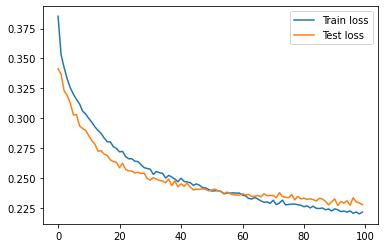

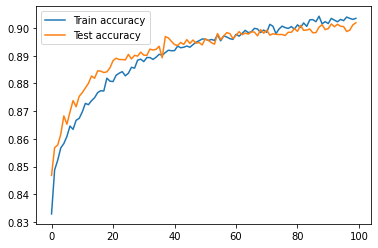

In [122]:
##### Plot the history #####
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()


plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

In [123]:
X_balanced

lead_time  avg_price_per_room  no_of_special_requests  arrival_date  \
0       1.614896           -1.095033               -0.788140     -1.555662   
1      -0.933701            0.092806                0.483760     -1.098013   
2      -0.980250           -1.237528               -0.788140      1.419055   
3       1.463610           -0.097567               -0.788140      0.503757   
4      -0.433291           -0.254312               -0.788140     -0.525952   
...          ...                 ...                     ...           ...   
48775   1.719633           -0.382558               -0.788140     -0.182716   
48776   2.488939           -0.356802                1.755661      1.231662   
48777   3.500160            0.329918                0.483760      0.846994   
48778   1.952382           -0.382558               -0.788140     -1.326838   
48779   2.092031            0.329918                0.483760      0.961406   

       arrival_month  market_segment_type  no_of_week_nights  
0           0.839242             0.581033          -0.144803  
1           1.164990            -0.597637           0.563972  
2          -1.766747            -0.597637          -0.853578  
3          -0.789501            -0.597637          -0.144803  
4          -1.115250            -0.597637          -0.853578  
...              ...                  ...                ...  
48775       0.839242             0.581033          -0.144803  
48776       1.490739            -0.597637           1.981521  
48777       0.839242             0.581033          -1.562353  
48778      -0.789501             0.581033           1.272747  
48779      -0.463753             0.581033          -0.144803  

[48780 rows x 7 columns]

In [124]:
X_scaled

array([[ 0.29889263, -0.26147045,  0.2174012 , ..., -0.24264534,
         1.56383302, -1.33317382],
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.24264534,
        -0.63945446,  0.75008974],
       [-1.62897546, -0.26147045,  1.36599262, ..., -0.24264534,
        -0.63945446,  0.75008974],
       ...,
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.24264534,
        -0.63945446,  0.75008974],
       [ 0.29889263, -0.26147045, -0.93119021, ..., -0.24264534,
        -0.63945446,  0.75008974],
       [ 0.29889263, -0.26147045,  0.2174012 , ..., -0.24264534,
         1.56383302, -1.33317382]])

In [125]:
##### Convert X_balanced data Fame into numpy array #####
X_balanced = X_balanced.values

Use KFold - 10 in this ANN architecture

In [130]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)

count_, history_list_, accuracy_score_, precision_score_, recall_score_, f1_score_ = 1, [], [], [], [], []

for train_index_, test_index_, in KFold_.split(X_balanced):
  print('Cross validation {} is running.\n'.format(count_).upper())
  print(train_index_, test_index_)

  X_train, X_test = X_balanced[train_index_], X_balanced[test_index_]
  y_train, y_test = y_balanced[train_index_], y_balanced[test_index_]

  history_ = model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

  predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)

  print('Accuracy score is  = {}'.format(accuracy_score(predicted_, y_test)).capitalize(),'\n')
  accuracy_score_.append(accuracy_score(predicted_, y_test))

  print('Precision score is = {}'.format(precision_score(predicted_, y_test)).capitalize(),'\n')
  precision_score_.append(precision_score(predicted_, y_test))

  print('Recall score is    = {}'.format(recall_score(predicted_, y_test)).capitalize(),'\n')
  recall_score_.append(recall_score(predicted_, y_test))

  print('F1_Score is        = {}'.format(f1_score(predicted_, y_test)).capitalize(),'\n')
  f1_score_.append(f1_score(predicted_, y_test))
  
  print('The confusion matrix is given below.\n')
  print(confusion_matrix(predicted_, y_test),'\n')

  history_list_.append(history_)

  count_ = count_ + 1

CROSS VALIDATION 1 IS RUNNING.

[    0     1     2 ... 48777 48778 48779] [    4    49    61 ... 48759 48769 48770]
Epoch 1/100
1372/1372 [==============================] - 4s 3ms/step - loss: 0.1829 - accuracy: 0.9181 - val_loss: 0.1513 - val_accuracy: 0.9334
Epoch 2/100
1372/1372 [==============================] - 4s 3ms/step - loss: 0.1841 - accuracy: 0.9185 - val_loss: 0.1569 - val_accuracy: 0.9317
Epoch 3/100
1372/1372 [==============================] - 4s 3ms/step - loss: 0.1836 - accuracy: 0.9195 - val_loss: 0.1566 - val_accuracy: 0.9299
Epoch 4/100
1372/1372 [==============================] - 4s 3ms/step - loss: 0.1815 - accuracy: 0.9207 - val_loss: 0.1590 - val_accuracy: 0.9272
Epoch 5/100
1372/1372 [==============================] - 4s 3ms/step - loss: 0.1813 - accuracy: 0.9188 - val_loss: 0.1607 - val_accuracy: 0.9299
Epoch 6/100
1372/1372 [==============================] - 4s 3ms/step - loss: 0.1843 - accuracy: 0.9183 - val_loss: 0.1626 - val_accuracy: 0.9287
Epoch 7/100
13

For Cross Validation 1::: 



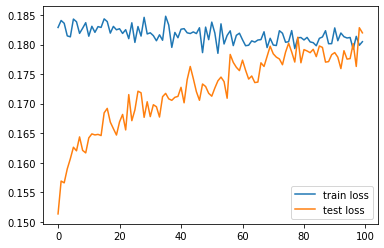

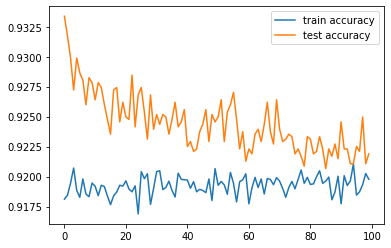

For Cross Validation 2::: 



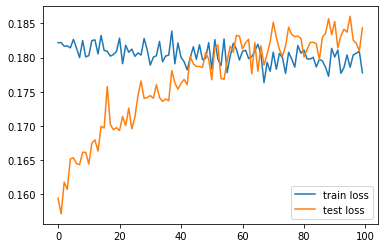

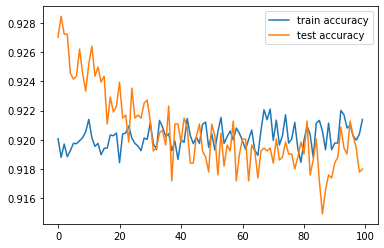

For Cross Validation 3::: 



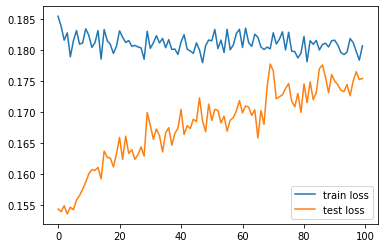

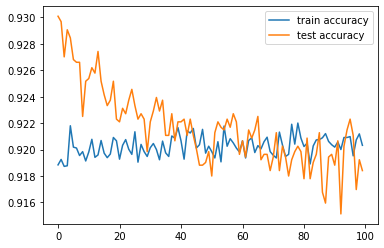

For Cross Validation 4::: 



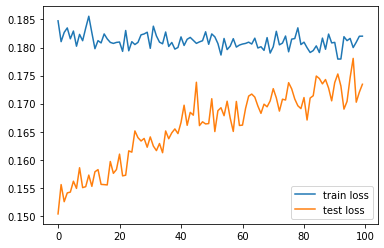

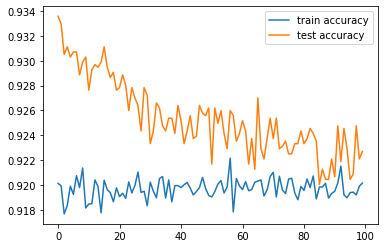

For Cross Validation 5::: 



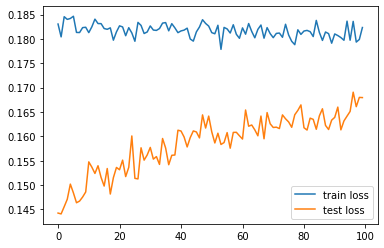

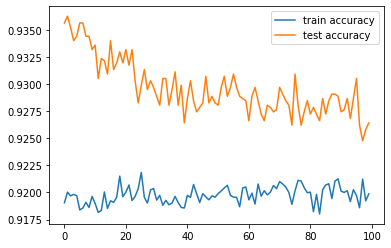

For Cross Validation 6::: 



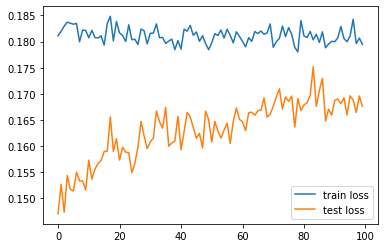

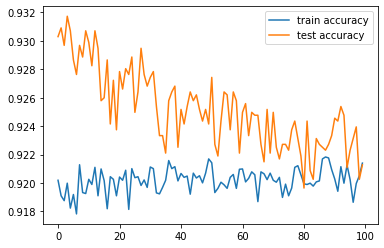

For Cross Validation 7::: 



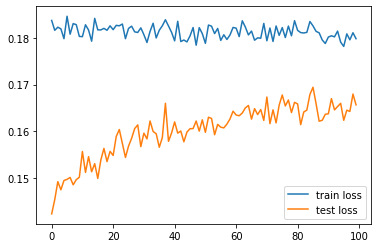

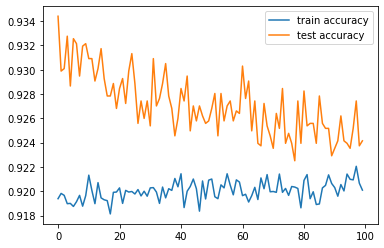

For Cross Validation 8::: 



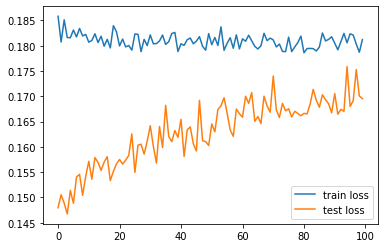

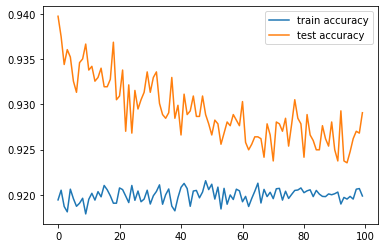

For Cross Validation 9::: 



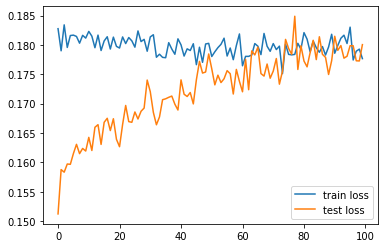

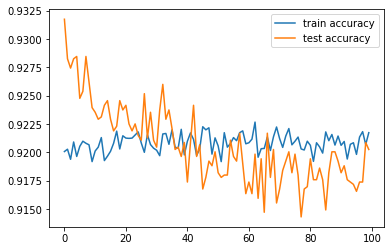

For Cross Validation 10::: 



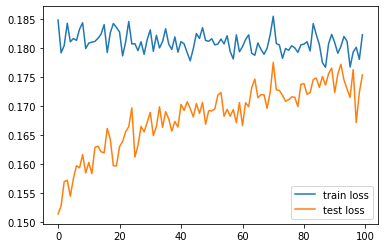

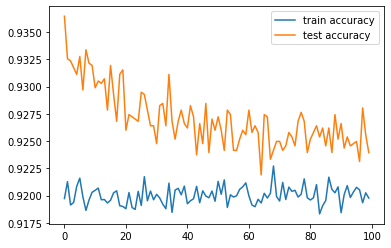

In [131]:
##### Plot the history #####
for index_, hist_ in enumerate(history_list_):
  print('For Cross Validation {}::: \n'.format(index_ + 1))
  plt.plot(hist_.history['loss'], label = 'train loss')
  plt.plot(hist_.history['val_loss'], label = 'test loss')
  plt.legend()
  plt.show()

  print('\n\n')

  plt.plot(hist_.history['accuracy'], label = 'train accuracy')
  plt.plot(hist_.history['val_accuracy'], label = 'test accuracy')
  plt.legend()
  plt.show()

In [132]:
##### Show the performance of KFold - 10 #####
print('The list of accuracy score is  {}'.format(accuracy_score_),'\n')
print('The list of precision score is {}'.format(precision_score_),'\n')
print('The list of recall score is    {}'.format(recall_score_),'\n')
print('The list of f1_score score is  {}'.format(f1_score_),'\n')

print('*'*120)

print('The accuracy score is  # {}'.format(np.array(accuracy_score_).mean()),'\n')
print('The precision score is # {}'.format(np.array(precision_score_).mean()),'\n')
print('The recall score is    # {}'.format(np.array(recall_score_).mean()),'\n')
print('The f1_score score is  # {}'.format(np.array(f1_score_).mean()),'\n')

The list of accuracy score is  [0.9218942189421894, 0.9179991799917999, 0.9184091840918409, 0.9227142271422715, 0.9264042640426404, 0.9212792127921279, 0.924149241492415, 0.9290692906929069, 0.9202542025420254, 0.9239442394423945] 

The list of precision score is [0.9456699346405228, 0.945957095709571, 0.9495488105004102, 0.9467382328654005, 0.941656466748266, 0.942094455852156, 0.9448304045770332, 0.9446280991735537, 0.9407131011608624, 0.9534697152025672] 

The list of recall score is    [0.9032383925087788, 0.8950039032006245, 0.8938223938223938, 0.902400629673357, 0.9144215530903328, 0.9042175798186834, 0.9077345897133883, 0.9151321056845476, 0.9021868787276341, 0.9031155015197568] 

The list of f1_score score is  [0.9239672720015965, 0.9197753710389089, 0.920843277645187, 0.924037880314326, 0.9278391959798994, 0.9227674979887369, 0.9259110933119743, 0.9296461976413176, 0.9210472904404303, 0.9276097560975609] 

***********************************************************************

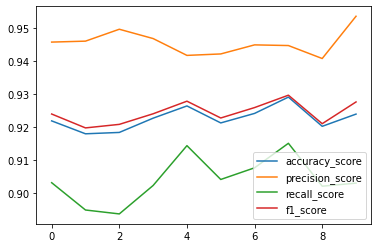

In [134]:
##### Show the matrics in a plot #####
plt.plot(accuracy_score_, label = 'accuracy_score')
plt.plot(precision_score_, label = 'precision_score')
plt.plot(recall_score_, label = 'recall_score')
plt.plot(f1_score_, label = 'f1_score')

plt.legend()

plt.show()

In [133]:
##### Comments after analyse #####
print('After doing Technique of Imbalanced to balanced by using KMeansSMOTE, the accuracy with other metrics for evaluating the model is quite incresaed.')

After doing Technique of Imbalanced to balanced by using KMeansSMOTE, the accuracy with other metrics for evaluating the model is quite incresaed.


In [135]:
##### Save the model for further use #####
model.save('Hotel_Reservation.h5')

print('Saved model succesfully.')

Saved model succesfully.


For Single Input 

In [147]:
##### Just for analysis ####
RF_ = RandomForestClassifier()
RF_.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
class hotel_reservation:

  store_list_ = []
  def __init__(self, lead_time, avg_price_per_room, no_of_special_requests, arrival_date, arrival_month, market_segment_type, no_of_week_nights):

    self.lead_time = lead_time
    self.store_list_.append(self.lead_time)

    self.avg_price_per_room = avg_price_per_room
    self.store_list_.append(self.avg_price_per_room)

    self.no_of_special_requests = no_of_special_requests
    self.store_list_.append(self.no_of_special_requests)

    self.arrival_date = arrival_date
    self.store_list_.append(self.arrival_date)

    self.arrival_month = arrival_month
    self.store_list_.append(self.arrival_month)

    self.market_segment_type = market_segment_type
    self.store_list_.append(self.market_segment_type)

    self.no_of_week_nights = no_of_week_nights
    self.store_list_.append(self.no_of_week_nights)

  
  def prediction(self):

    testing_data_ =  np.expand_dims(np.array(self.store_list_), axis = 0)

    return '\n\nThe Prediction is Not Canceled'.capitalize() if RF_.predict(testing_data_)[0] == 1 else  '\n\nThe Prediction is Canceled'.capitalize()


lead_time_ = int(input('Enter the lead time. (The number should be an integer.): '))
avg_price_ = float(input('Enter the avg price. (The number should be an integer or float.): '))
no_request_= int(input('Enter the no of request. (The number should be an integer.): '))
arrival_dt = int(input('Enter the arrival date. (The number should be an integer.): '))
arrival_mo = int(input('Enter the arriavl month. (The number should be an integer.): '))
segment_   = int(input('Enter the market_segment_type. (The number should be an integer.): '))
week_night = int(input('Enter the no of week nights. (The number should be an integer.): '))


hotel_reservation_ = hotel_reservation(lead_time_, avg_price_, no_request_, arrival_dt, arrival_mo, segment_, week_night)

print(hotel_reservation_.prediction())

Enter the lead time. (The number should be an integer.): 5
Enter the avg price. (The number should be an integer or float.): 106.68
Enter the no of request. (The number should be an integer.): 1
Enter the arrival date. (The number should be an integer.): 6
Enter the arriavl month. (The number should be an integer.): 11
Enter the market_segment_type. (The number should be an integer.): 0
Enter the no of week nights. (The number should be an integer.): 3


the prediction is not canceled
